# **Parte I Del Proyecto**

Daniel Bernal

En esta primera parte de la actividad se encuentra el respaldo de las decisiones tomadas (Graficas, comparaciones y justificaciones) Es por este motivo que se recomienda encarecida revisar las diferentes comparaciones pues es la base de todo el fundamento.

La segunda parte del proyecto se centra en extraer conclusiones fundamentadas, interpretando los resultados obtenidos sin depender únicamente de visualizaciones gráficas, para proporcionar un análisis más profundo y estructurado. En este contexto, se destaca el modelo de Random Forest como la solución más robusta y confiable debido a su capacidad de generalización, manejo de datos heterogéneos y consistencia en diversas condiciones de prueba.

**Intencion:**

El siguiente proyecto tiene la intención de evaluar el desempeño de diferentes enfoques para la selección de características y modelos de predicción mediante el planteamiento de pasos y preguntas clave que permitan entender las relaciones entre las variables y optimizar los resultados obtenidos. A través de un proceso estructurado, se busca no solo construir un modelo predictivo robusto, sino también comprender las decisiones tomadas en cada etapa del análisis.

**Enfoque:**

En la primera parte del proyecto, se realiza un análisis exploratorio inicial y se dividen los datos en conjuntos de entrenamiento y prueba para garantizar evaluaciones imparciales. A partir de este análisis, se estudian estrategias para la selección y extracción de características utilizando distintos enfoques como árboles de decisión, bosques aleatorios y regresión logística, comparando sus resultados en términos de relevancia y aporte al modelo final.

**Metodologia:**

Posteriormente, se evalúan múltiples modelos predictivos, incluidos KNN, árboles de decisión, bosques aleatorios y regresión logística, implementando pipelines que integran técnicas de preprocesamiento como imputación de datos, escalado y transformación de variables categóricas. Los modelos son validados mediante métodos de validación cruzada y ajuste de hiperparámetros, permitiendo identificar el mejor desempeño en métricas clave como accuracy, precision y recall, y analizando los resultados en términos de sesgo y varianza.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## **Paso 1**

Parte I Análisis Exploratorio

Dividir en train y test(random state 123)


In [ ]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

# Convertir variables categóricas a numéricas con get_dummies porque no hay jerarquía
dfII = pd.get_dummies(df)

# Dividiendo los datos en train y test
X = dfII.drop('Revenue', axis=1)
y = dfII['Revenue']  # variable objetivo
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**Ahora realizamos el análisis exploratorio en el conjunto de entrenamiento (x_train y y_train)**


In [ ]:
# 1. Resumen de datos
print(x_train.describe())  # Estadísticas descriptivas para variables numéricas del conjunto de entrenamiento
print(x_train.info())       # Información sobre el tipo de datos y valores no nulos en el conjunto de entrenamiento

       Administrative  Administrative_Duration  Informational  \
count     8631.000000              8631.000000    8631.000000   
mean         2.318851                80.035963       0.496582   
std          3.326228               173.132521       1.244019   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.000000       0.000000   
75%          4.000000                93.115833       0.000000   
max         27.000000              3398.750000      16.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             8631.000000     8631.000000              8631.000000   
mean                33.735985       31.506546              1179.548652   
std                138.995400       44.119701              1895.590842   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [ ]:
# Variables que se convertirán en categóricas
categorical_columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
                       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
                       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
                       'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']

# Convertir las variables seleccionadas en categóricas
for col in categorical_columns:
    x_train[col] = x_train[col].astype('category')

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8631 entries, 2476 to 3582
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Administrative                 8631 non-null   int64   
 1   Administrative_Duration        8631 non-null   float64 
 2   Informational                  8631 non-null   int64   
 3   Informational_Duration         8631 non-null   float64 
 4   ProductRelated                 8631 non-null   int64   
 5   ProductRelated_Duration        8631 non-null   float64 
 6   BounceRates                    8631 non-null   float64 
 7   ExitRates                      8631 non-null   float64 
 8   PageValues                     8631 non-null   float64 
 9   SpecialDay                     8631 non-null   float64 
 10  OperatingSystems               8631 non-null   category
 11  Browser                        8631 non-null   category
 12  Region                         8631 

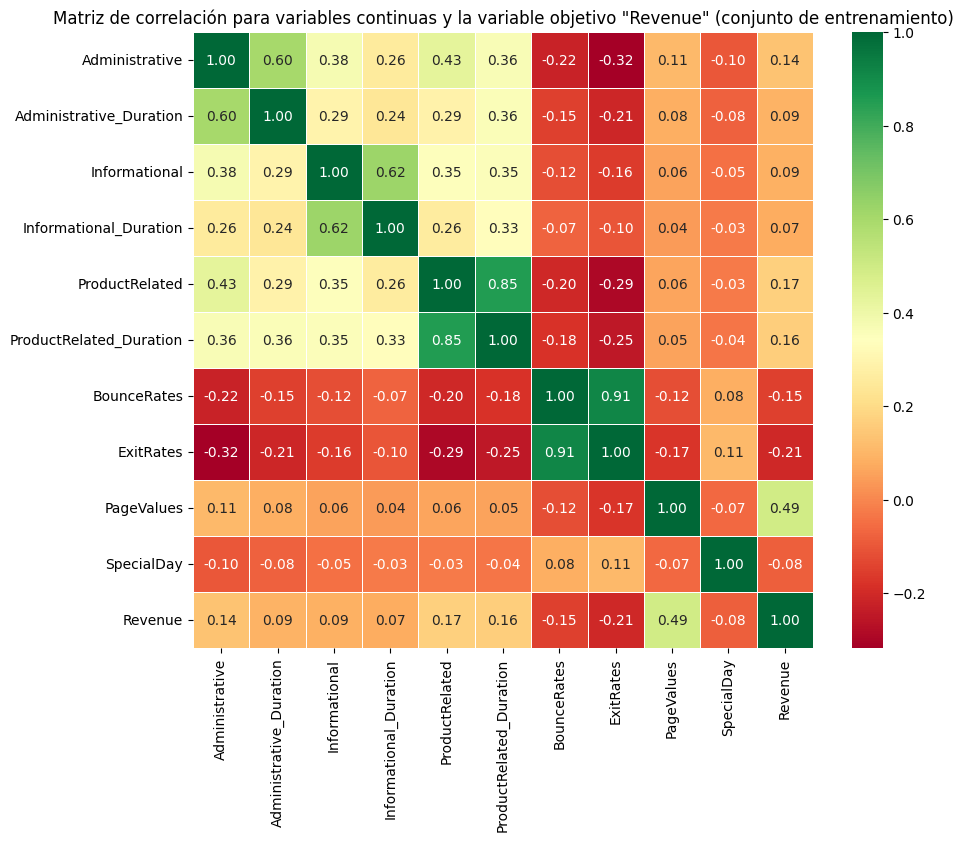

In [ ]:
# Combinar las variables continuas con la variable objetivo en el conjunto de entrenamiento
x_train_combined = pd.concat([x_train_continuous, y_train], axis=1)

# Calcular la matriz de correlación
correlation_matrix_train_combined = x_train_combined.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train_combined, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación para variables continuas y la variable objetivo "Revenue" (conjunto de entrenamiento)')
plt.show()

**Variables continuas que se usarán debido a su correlación con la variable a predecir (revenue):**


1.   PageValue
2.   Administrative
3. ProducRelated
4. ProductRelated_Duration
5. BounceRates
6. ExitRates



**Explicacion de que es cada variable**

**Administrative:** Esta variable representa el número de páginas administrativas visitadas por el usuario durante su sesión en el sitio web.

**Administrative_Duration:** Es la duración total, en segundos, que el usuario pasó en páginas administrativas durante su sesión.

**Informational:** Indica el número de páginas informativas visitadas por el usuario durante su sesión en el sitio web.

**Informational_Duration:** Representa la duración total, en segundos, que el usuario pasó en páginas informativas durante su sesión.

**ProductRelated:** Esta variable cuenta el número de páginas relacionadas con productos visitadas por el usuario durante su sesión en el sitio web.

**ProductRelated_Duration:** Es la duración total, en segundos, que el usuario pasó en páginas relacionadas con productos durante su sesión.

**BounceRates:** Representa la tasa de rebote, es decir, el porcentaje de visitas a una sola página sin interacción adicional con el sitio web, es decir, aquellas en las que el visitante abandona el sitio sin interactuar con otras páginas. En otras palabras, un rebote ocurre cuando un usuario llega a una página del sitio web y luego abandona el sitio sin realizar ninguna acción adicional, como hacer clic en enlaces, interactuar con elementos de la página o navegar a otras secciones del sitio..

**ExitRates:** Es la tasa de salida, que indica el porcentaje de usuarios que salieron del sitio web después de ver una página particular.

**PageValues:** La métrica de "Page Value" (Valor de Página) es una medida en análisis web que asigna un valor numérico a cada página del sitio web en función de su contribución al logro de los objetivos de conversión del sitio, como ventas, suscripciones, descargas, etc. Es una métrica importante en el seguimiento del rendimiento del sitio web y en la optimización de la experiencia del usuario.

El valor de página se calcula promediando los ingresos totales generados por todas las transacciones que tienen lugar después de que un usuario visita una página en particular. Esto significa que las páginas que contribuyen de manera significativa a la conversión de los visitantes tendrán un valor de página más alto.

**SpecialDay:** Esta variable representa la proximidad del tiempo de la visita del usuario a un día especial como el Día de San Valentín o el Día de la Madre, donde los valores más altos indican mayor proximidad al día especial.

**Month:** Indica el mes de la visita del usuario al sitio web.

**OperatingSystems:** Representa el sistema operativo utilizado por el usuario durante su visita al sitio web.

**Browser:** Indica el navegador web utilizado por el usuario durante su visita al sitio web.

**Region:** Esta variable indica la región geográfica del usuario.

**TrafficType:** Indica el tipo de tráfico que llevó al usuario al sitio web.

**VisitorType:** Representa el tipo de visitante, como 'Returning_Visitor', 'New_Visitor' o 'Other'.

**Weekend:** Es una variable booleana que indica si la visita del usuario ocurrió durante el fin de semana o no.

**Revenue:** Es la variable objetivo. Es una variable booleana que indica si el usuario generó ingresos (realizó una compra) durante su sesión en el sitio web.

**Tipos de paginas web:**

**Páginas Administrativas:** Estas son páginas que brindan información relacionada con la administración del sitio web, como el inicio de sesión, la configuración de la cuenta, la política de privacidad, el contacto, etc. Los usuarios pueden visitar estas páginas para realizar acciones administrativas o buscar información sobre la gestión del sitio.

**Páginas Informativas:** Son aquellas diseñadas para proporcionar información sobre productos, servicios, promociones u otra información relevante para los usuarios. Por lo general, estas páginas no implican una transacción directa, sino que están destinadas a educar o informar al usuario sobre aspectos específicos relacionados con el sitio web o los productos/servicios que ofrece.

**Páginas Relacionadas con Productos:** Son aquellas páginas que muestran detalles específicos de productos o servicios que el sitio web ofrece. Estas páginas pueden incluir descripciones de productos, imágenes, precios, reseñas de clientes, opciones de compra, etc. Los usuarios suelen visitar estas páginas con la intención de explorar productos, comparar características o realizar una compra.

**Suposiciones con base a los datos del mapa de correlacion:**


- ¿Cuál es la relación entre las características relacionadas con el tiempo (Weekend, Month y special Day) y la generación de ingresos, algunas correlaciones varian?

-Suposicion: Como se ve a traves de los meses, la intencion de compra puede variar pero se eleva en nov, los dias especiales no tienen nada que ver como se ve que la correlacion esta negativa

- ¿Hay un impacto del tipo de visitante (new, returning, other) en si se generarán ingresos?

-Suposicion: Tendria sintido que los clientes que regresen podran tener un mayor impacto pues quiere decir que pueden comprar en futuras ocasiones, sin embargo segun el mapa de correlacion se puede ver que los que regresan son los que menos tienen y los que mas son los nuevos


- ¿Cómo influyen algunas métricas de paginas web (BounceRates, Administrative_Duration, PageValues y productRelated) en la generación de ingresos?

-Suposicion: Si los visitantes salen de la pagina sin observar el contenido con detenimiento puede decir queno se realizo alguna compra, lo qeu seria el page values que es la variable mas importante dentro de nuestro estudio si tenemos en cuenta las correlaciones, las otras metricas tienen menor influencia

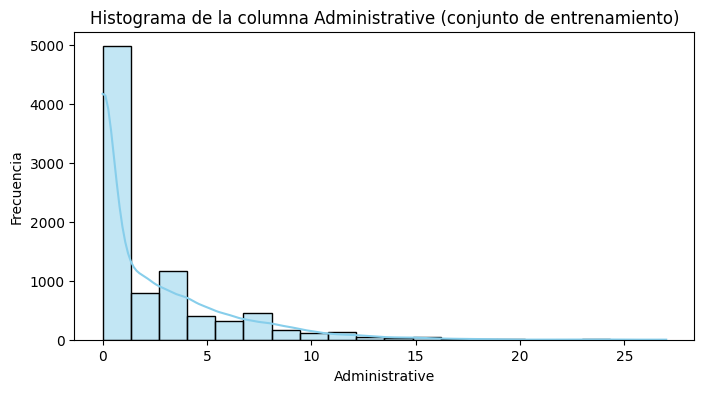

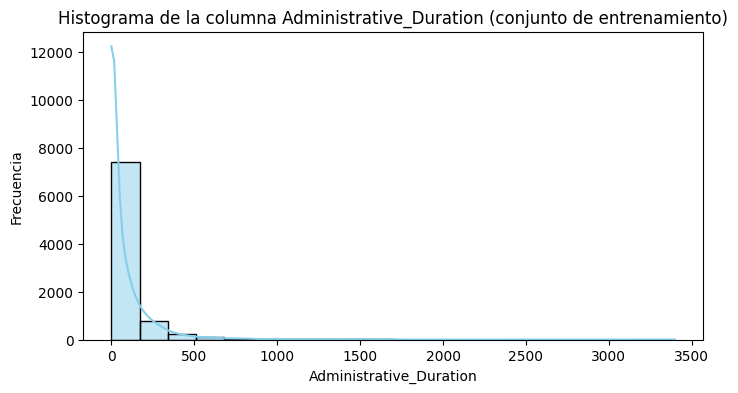

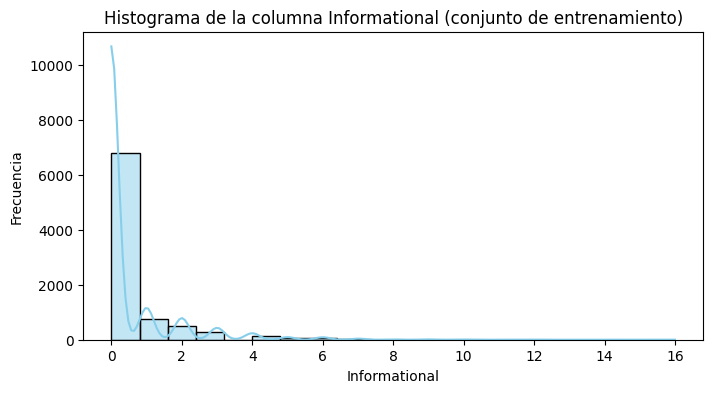

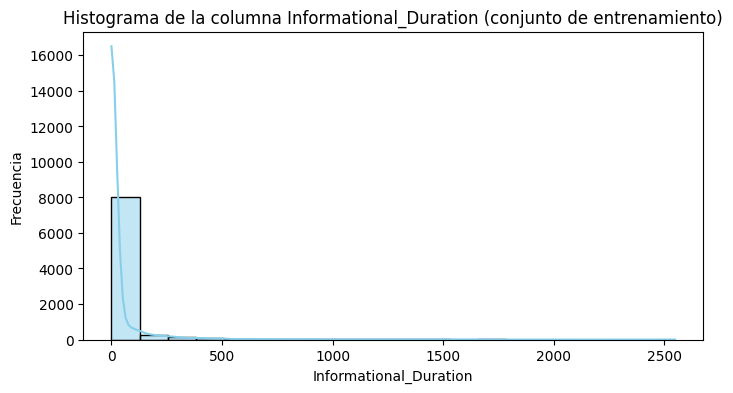

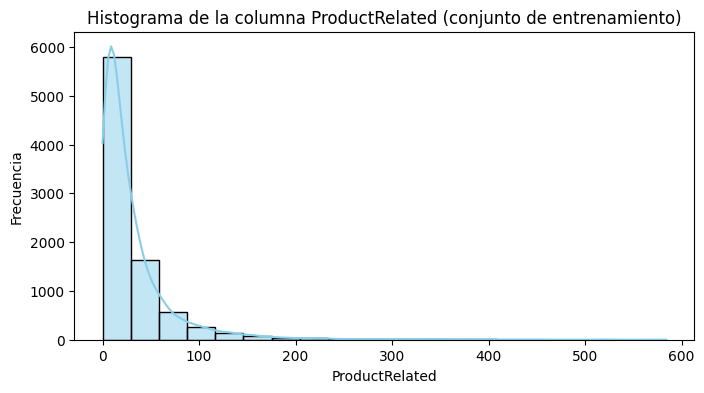

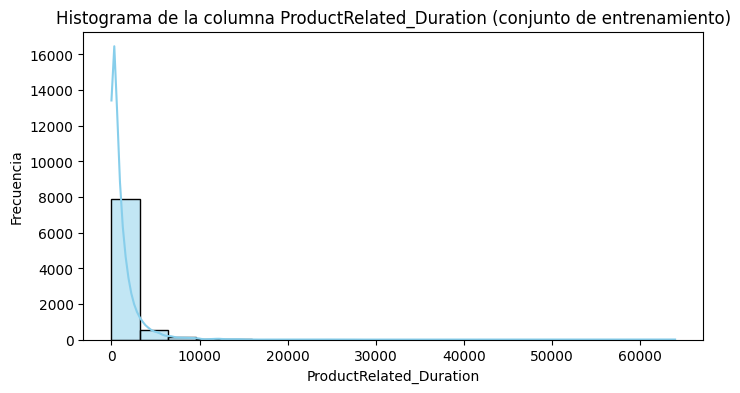

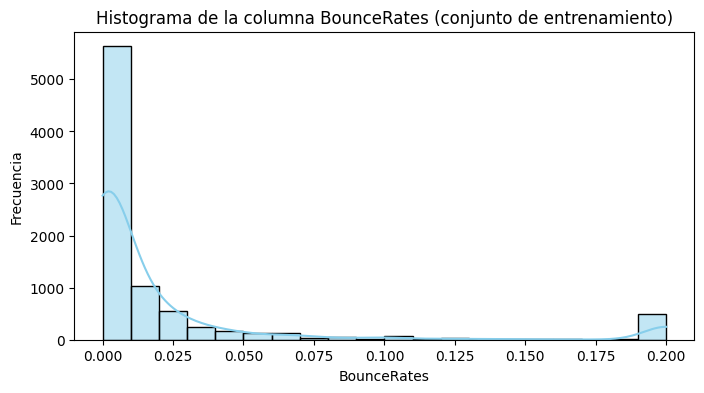

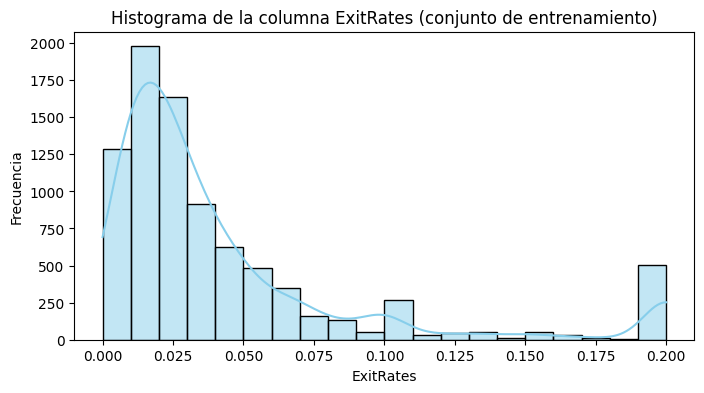

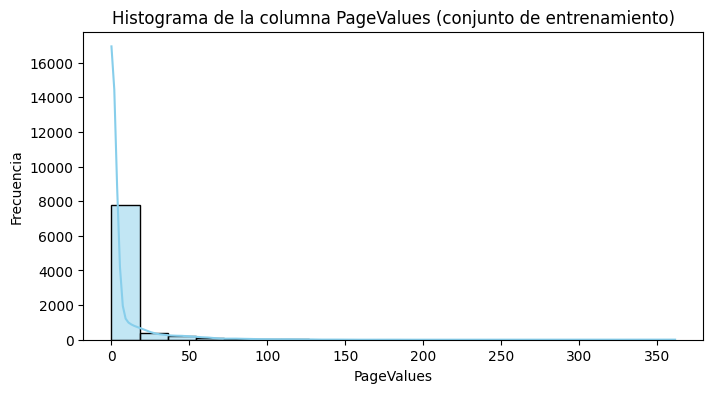

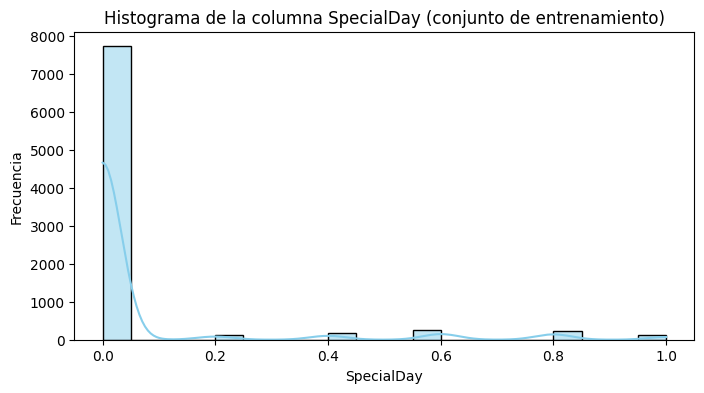

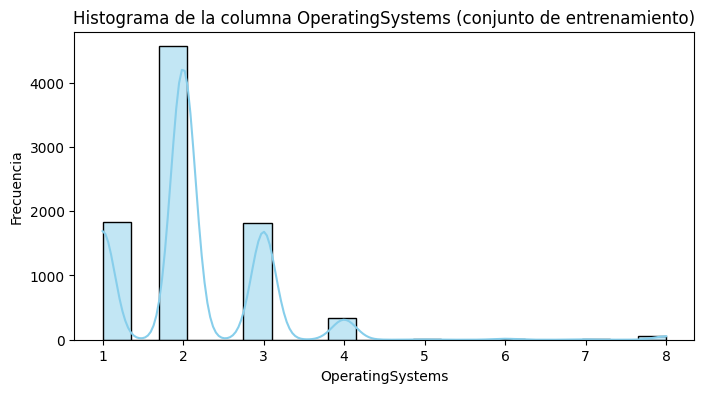

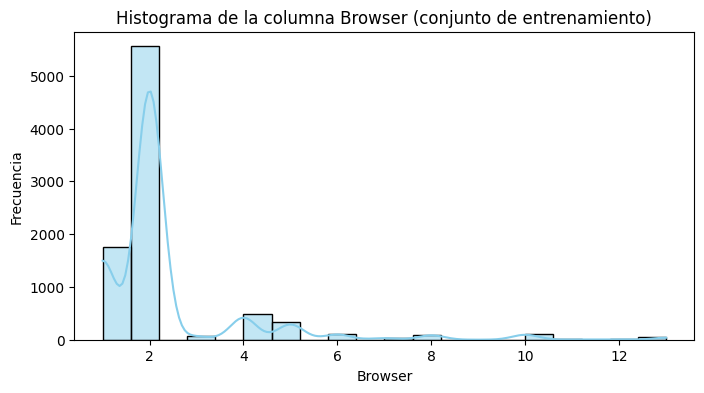

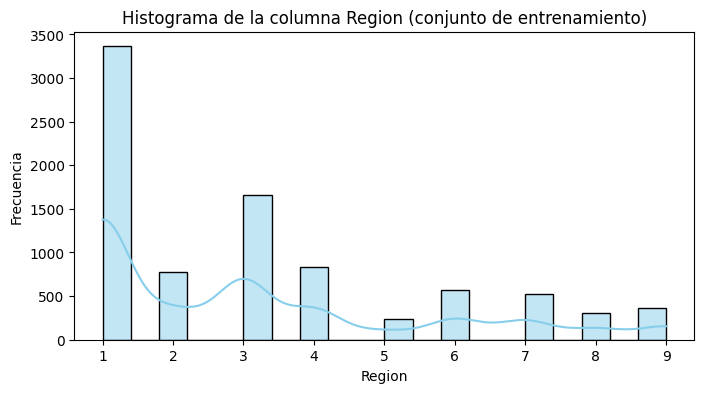

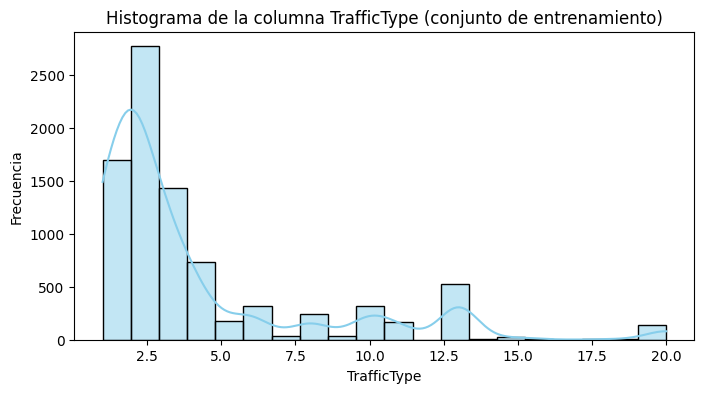

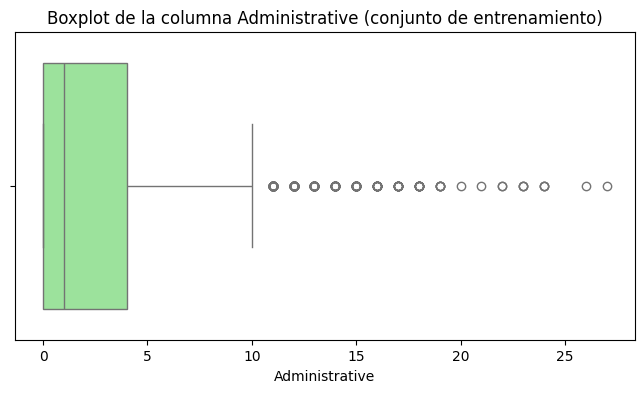

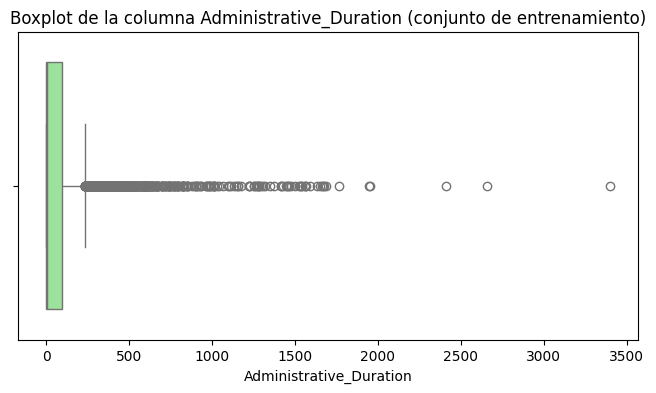

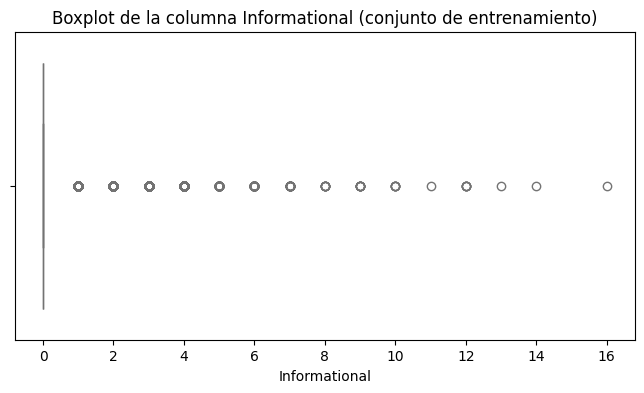

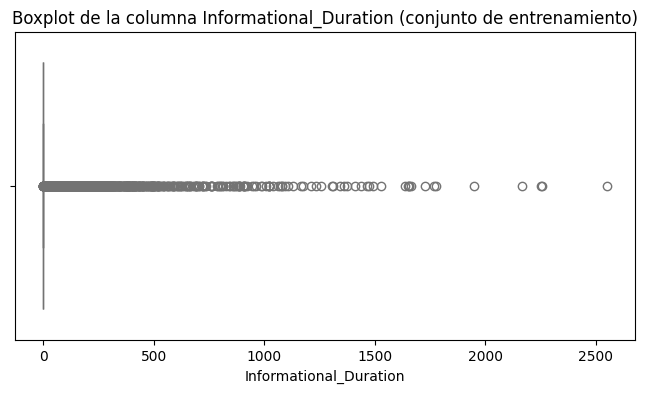

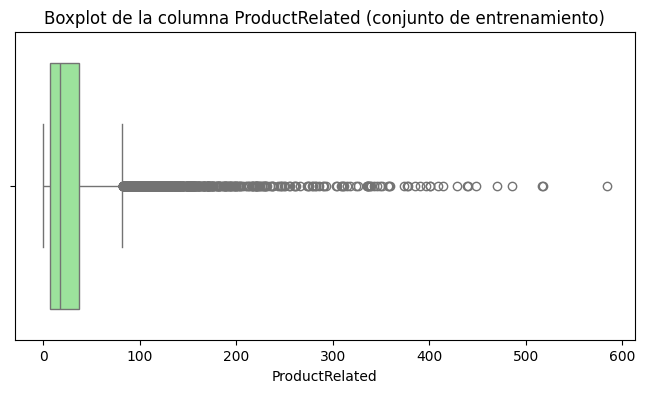

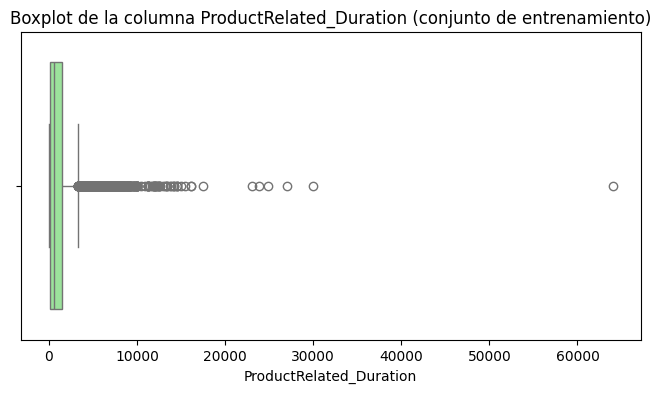

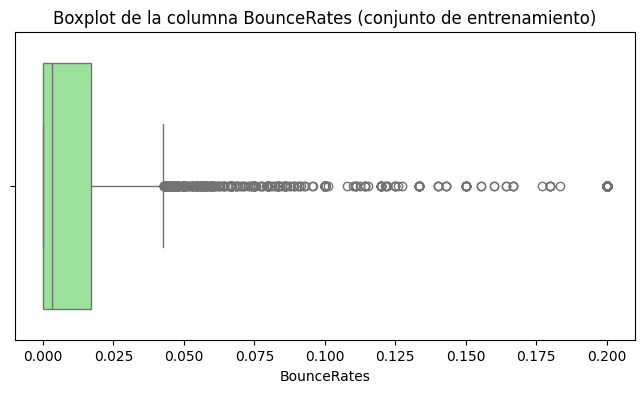

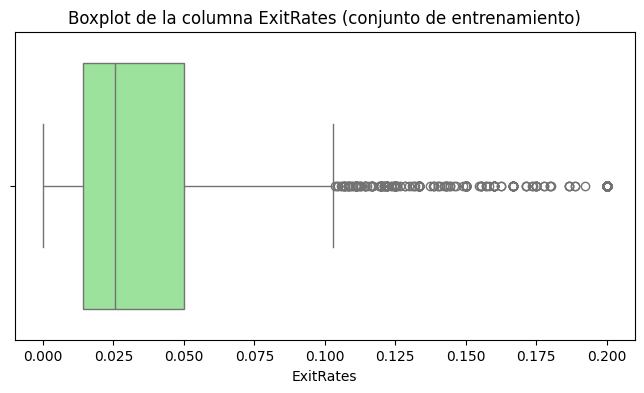

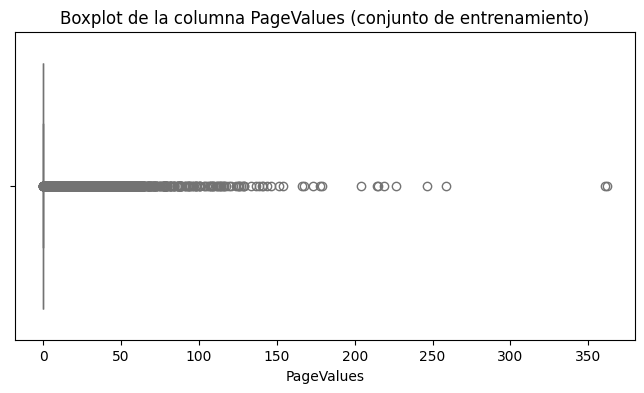

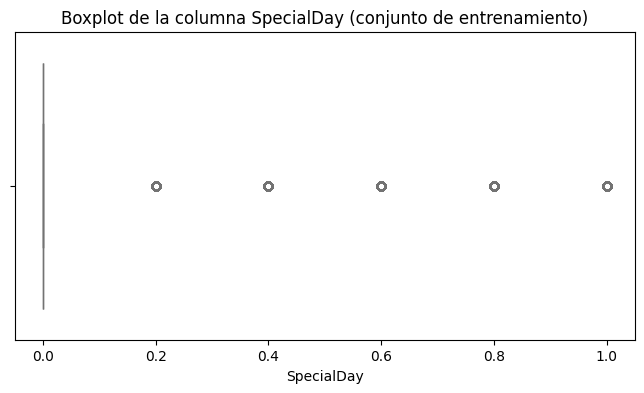

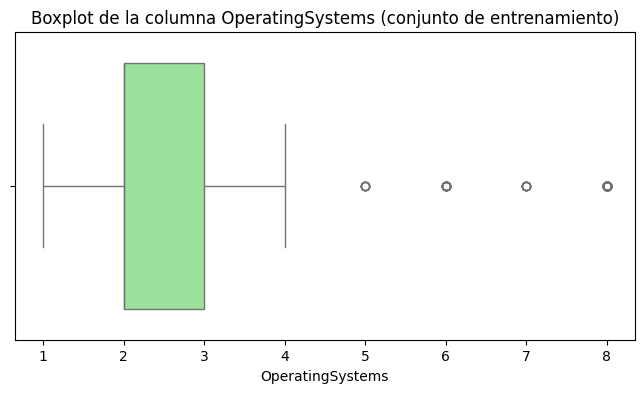

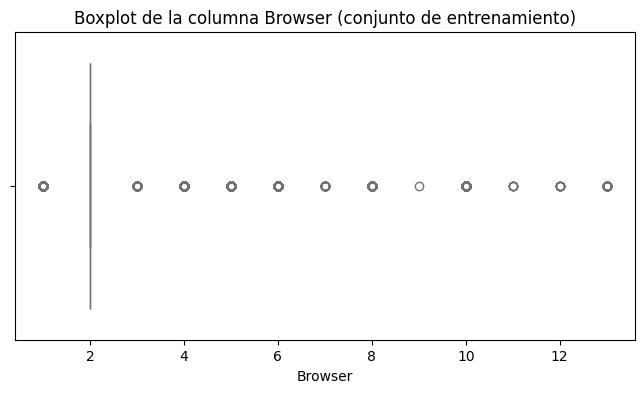

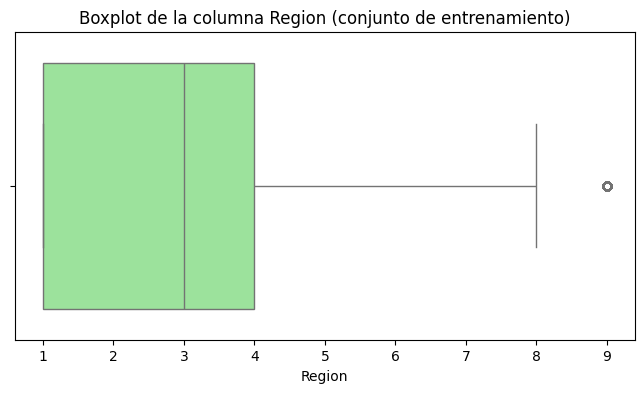

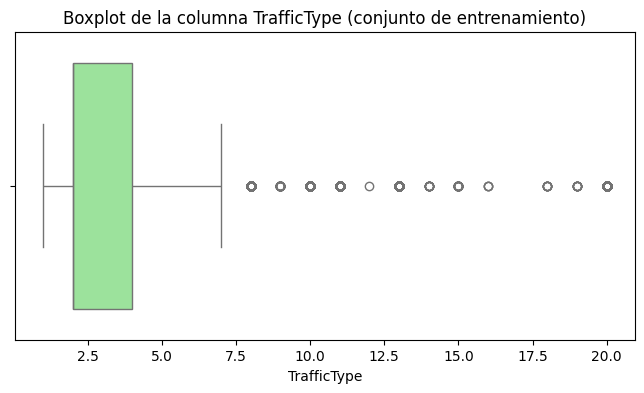

In [ ]:
# Histogramas de todas las columnas numéricas en el conjunto de entrenamiento
numeric_columns_train = x_train.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns_train:
    plt.figure(figsize=(8, 4))
    sns.histplot(x_train[col], bins=20, kde=True, color='skyblue', edgecolor="black")
    plt.title(f"Histograma de la columna {col} (conjunto de entrenamiento)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Boxplots de todas las columnas numéricas en el conjunto de entrenamiento
for col in numeric_columns_train:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=x_train[col], color='lightgreen')
    plt.title(f"Boxplot de la columna {col} (conjunto de entrenamiento)")
    plt.xlabel(col)
    plt.show()

# Por último, visualizamos los boxplots de todas las columnas categóricas
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', edgecolor="black")
    plt.title(f"Conteo de la columna {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.show()

**Imagen de los histogramas:**


**Imagen de los boxplot:**


In [ ]:
# Manejo de valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


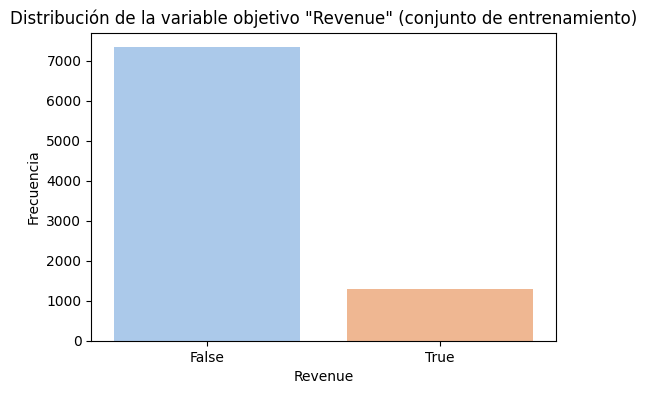

In [ ]:
# Exploración de la variable objetivo en el conjunto de entrenamiento
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, hue=y_train, palette='pastel', legend=False)
plt.title('Distribución de la variable objetivo "Revenue" (conjunto de entrenamiento)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.show()

**Suposiciones con base a los datos del la coleccion de histogramas y boxplot:**


- ¿Cuál es la relación entre las características relacionadas con el tiempo (Weekend, Month y special Day) y la generación de ingresos, algunas correlaciones varian?

-Suposicion:
Se puede evidenciar con los histogramas que los meses estan variando en su frecuencia siendo nov y may los mas grandes, gracias a esta visualizacion se puede evidenciar que hay un cambio a traves de ellos y cuales de esos cambios son significativos, tambien se puede ver que especial day no esta distribuida y tiene una gran inclinacion en los valores pequeños. Con los boxplot se puede ver que casi todos los valores estan muy alejados de la mediana lo que quiere decir que hay valores atipicos dentro del marco de datos.

- ¿Hay un impacto del tipo de visitante (new, returning, other) en si se generarán ingresos?

-Suposicion:
Lo que podemso ver en el histograma de los visitantes es que hay muchos mas visitantes del tipo que regresa que el de los que son nuevos, si tenemso en cuenta el mapa de calor esto quiere decir que aunque el impacto es mayor por la correlacion de los visitantes nuevos, este podria ser amyor si tuviera una frecuencia como la de los que regresan. Los boxplot sugieren la misma conclusion que la suposicion anterior.


- ¿Cómo influyen algunas métricas de paginas web (BounceRates, Administrative_Duration, PageValues y productRelated) en la generación de ingresos?

-Suposicion:
Segun el histograma BounceRates tiene una distribucion un poco menos sesgada que las otras, sin embargo, sigue teniendo un comportamiento sesgado a la derecha, esto significa que son mas bajos los porcentajes donde esto ocurre sin embargo crece un poco en los porcentajes donde sucede, administrative duration tiene cesgo a la derecha lo que quiere decir que pasa menos tiempo en paginas administrativas, page values nos indica que los valores asignados a las paginas son frecuentemente pequeños lo que quiere decir que aunque el impacto sobre la variable a predecir sea muy grande podria ser mucho mejor ya que los valores son pequeños y subirlos podria significar tener exito en los objetivos de la pagina.

In [ ]:
# Crear la tabla de contingencia para cada variable con respecto a "Revenue"
for var in categorical_columns:
    crosstab_result = pd.crosstab(index=x_train[var], columns=y_train, margins=True, margins_name='Total')
    print(f"\nTabla de contingencia para {var} vs. Revenue:")
    print(crosstab_result)


Tabla de contingencia para OperatingSystems vs. Revenue:
Revenue           False  True  Total
OperatingSystems                    
1                  1570   258   1828
2                  3784   780   4564
3                  1632   185   1817
4                   280    57    337
5                     5     0      5
6                    14     2     16
7                     5     1      6
8                    42    16     58
Total              7332  1299   8631

Tabla de contingencia para Browser vs. Revenue:
Revenue  False  True  Total
Browser                    
1         1501   253   1754
2         4709   848   5557
3           70     3     73
4          414    76    490
5          285    54    339
6          106    11    117
7           29     5     34
8           85    13     98
9            1     0      1
10          92    18    110
11           5     0      5
12           6     2      8
13          29    16     45
Total     7332  1299   8631

Tabla de contingencia para Region vs.

In [ ]:
# Lista de variables a eliminar
variables_a_eliminar = ['Administrative_Duration', 'Informational', 'Informational_Duration', 'SpecialDay', 'OperatingSystems', 'Browser']

# Eliminar las variables de x_train
x_train_I = x_train.drop(variables_a_eliminar, axis=1)
x_test_I = x_test.drop(variables_a_eliminar, axis=1)

## **Paso 2**

Parte 2 Selección y extracción de características

Selección de características con DecisionTree, RandomForest y Logistic Regression. Analizar resultados.

In [ ]:
#Convertir variables categoricas a nuemricas con get_dummies porque no hay jerarquia
month_dummies = pd.get_dummies(df['Month'], prefix='Month')

visitor_type_dummies = pd.get_dummies(df['VisitorType'], prefix='VisitorType')

df2 = pd.concat([df, month_dummies, visitor_type_dummies], axis=1)

df2.drop(['Month', 'VisitorType'], axis=1, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
# Dividiendo los datos en train y test
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']  # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

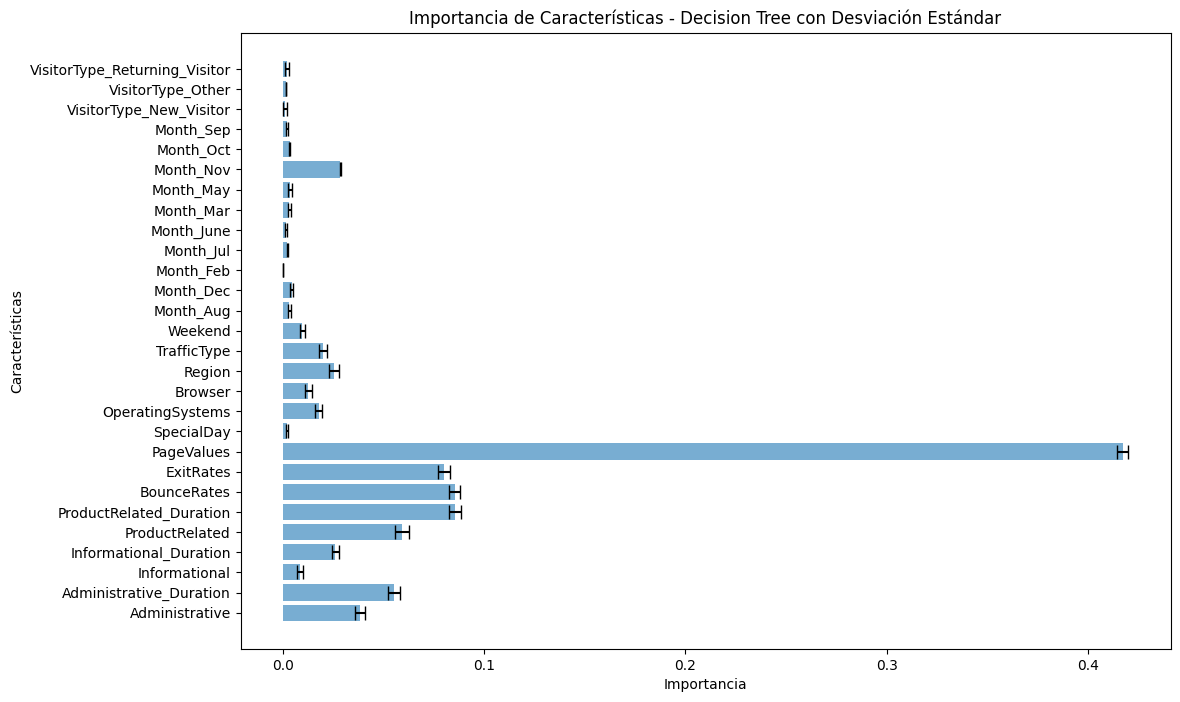

Administrative: 0.0382 +/- 0.0023
Administrative_Duration: 0.0553 +/- 0.0029
Informational: 0.0086 +/- 0.0014
Informational_Duration: 0.0259 +/- 0.0017
ProductRelated: 0.0591 +/- 0.0033
ProductRelated_Duration: 0.0857 +/- 0.0030
BounceRates: 0.0854 +/- 0.0026
ExitRates: 0.0801 +/- 0.0031
PageValues: 0.4172 +/- 0.0028
SpecialDay: 0.0020 +/- 0.0005
OperatingSystems: 0.0178 +/- 0.0019
Browser: 0.0126 +/- 0.0018
Region: 0.0254 +/- 0.0023
TrafficType: 0.0200 +/- 0.0021
Weekend: 0.0096 +/- 0.0012
Month_Aug: 0.0033 +/- 0.0005
Month_Dec: 0.0045 +/- 0.0007
Month_Feb: 0.0000 +/- 0.0000
Month_Jul: 0.0022 +/- 0.0004
Month_June: 0.0017 +/- 0.0006
Month_Mar: 0.0033 +/- 0.0006
Month_May: 0.0034 +/- 0.0009
Month_Nov: 0.0285 +/- 0.0003
Month_Oct: 0.0033 +/- 0.0004
Month_Sep: 0.0022 +/- 0.0005
VisitorType_New_Visitor: 0.0012 +/- 0.0010
VisitorType_Other: 0.0014 +/- 0.0000
VisitorType_Returning_Visitor: 0.0020 +/- 0.0010


In [ ]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

# Obtener las importancias de las características
feature_importance_dt = dt.feature_importances_

# Simular múltiples árboles de decisión y calcular las importancias de características
n_simulations = 1000
simulated_importances = np.array([DecisionTreeClassifier(random_state=seed).fit(X_train, y_train).feature_importances_ for seed in range(n_simulations)])

# Calcular la desviación estándar de las importancias de características
importance_std = np.std(simulated_importances, axis=0)

# Crear el gráfico con barras de error que representan la desviación estándar
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_dt, xerr=importance_std, capsize=5, alpha=0.6)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características - Decision Tree con Desviación Estándar')
plt.show()

for feature, importance, std_dev in zip(X.columns, feature_importance_dt, importance_std):
    print(f"{feature}: {importance:.4f} +/- {std_dev:.4f}")

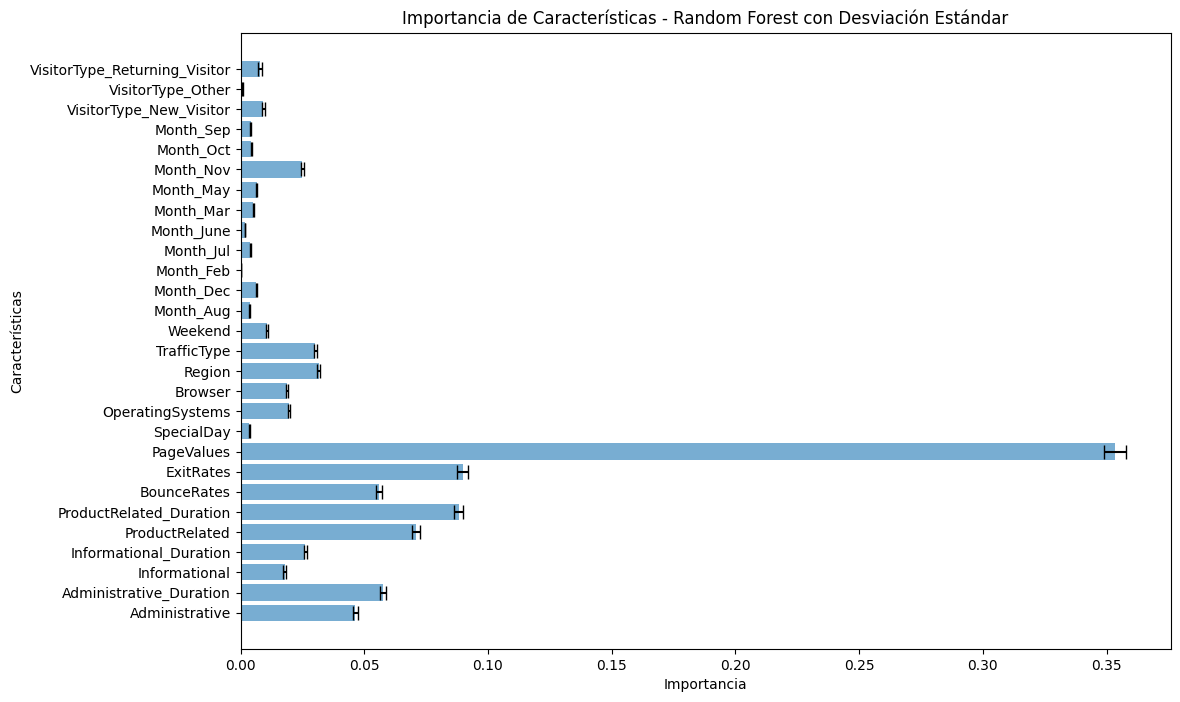

Administrative: 0.0463 +/- 0.0011
Administrative_Duration: 0.0576 +/- 0.0011
Informational: 0.0178 +/- 0.0005
Informational_Duration: 0.0262 +/- 0.0006
ProductRelated: 0.0709 +/- 0.0015
ProductRelated_Duration: 0.0881 +/- 0.0018
BounceRates: 0.0559 +/- 0.0013
ExitRates: 0.0897 +/- 0.0023
PageValues: 0.3535 +/- 0.0045
SpecialDay: 0.0034 +/- 0.0002
OperatingSystems: 0.0197 +/- 0.0004
Browser: 0.0189 +/- 0.0005
Region: 0.0317 +/- 0.0006
TrafficType: 0.0303 +/- 0.0006
Weekend: 0.0107 +/- 0.0003
Month_Aug: 0.0037 +/- 0.0002
Month_Dec: 0.0064 +/- 0.0003
Month_Feb: 0.0003 +/- 0.0000
Month_Jul: 0.0039 +/- 0.0002
Month_June: 0.0019 +/- 0.0001
Month_Mar: 0.0052 +/- 0.0003
Month_May: 0.0066 +/- 0.0002
Month_Nov: 0.0249 +/- 0.0007
Month_Oct: 0.0043 +/- 0.0002
Month_Sep: 0.0041 +/- 0.0002
VisitorType_New_Visitor: 0.0091 +/- 0.0006
VisitorType_Other: 0.0008 +/- 0.0001
VisitorType_Returning_Visitor: 0.0080 +/- 0.0007


In [ ]:
# Entrenar el modelo
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

# Obtener las importancias de las características
feature_importance_rf = rf.feature_importances_

# Simular múltiples modelos de bosque aleatorio y calcular las importancias de características
n_simulations = 100
simulated_importances = np.array([RandomForestClassifier(n_estimators=100, random_state=seed).fit(X_train, y_train).feature_importances_ for seed in range(n_simulations)])

# Calcular la desviación estándar de las importancias de características
importance_std = np.std(simulated_importances, axis=0)

# Crear el gráfico con barras de error que representan la desviación estándar
plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_rf, xerr=importance_std, capsize=5, alpha=0.6)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características - Random Forest con Desviación Estándar')
plt.show()

# Imprimir las importancias con su respectiva desviación estándar
for feature, importance, std_dev in zip(X.columns, feature_importance_rf, importance_std):
    print(f"{feature}: {importance:.4f} +/- {std_dev:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

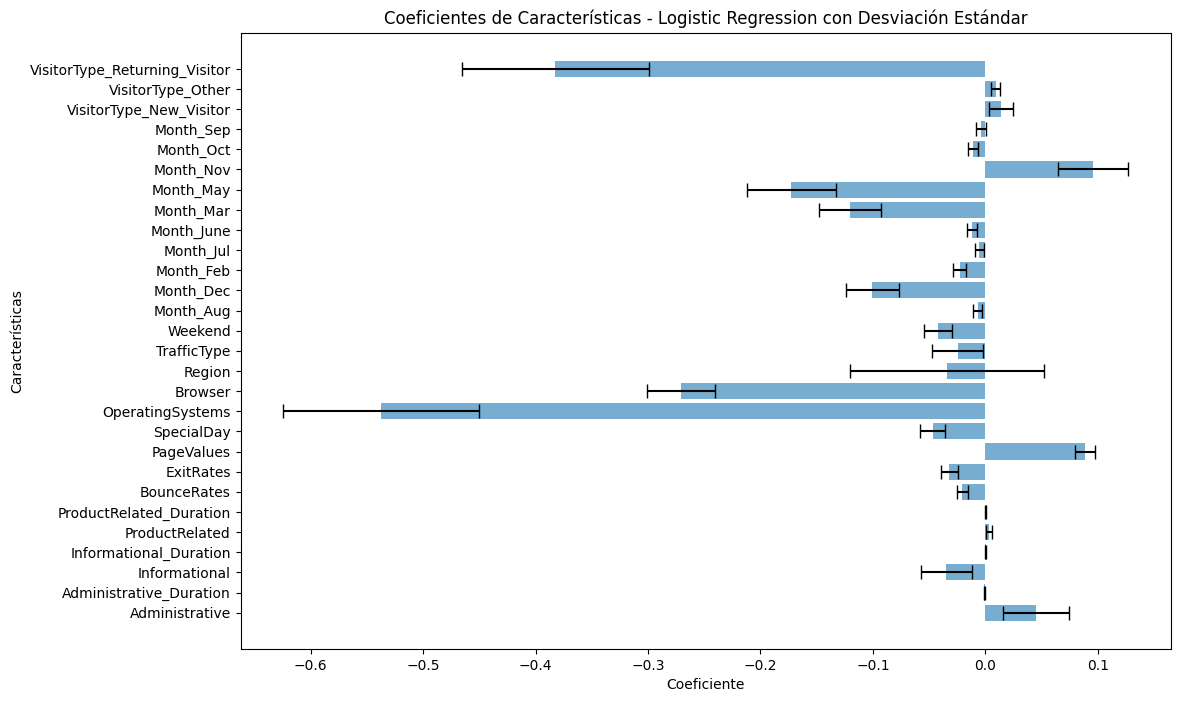

Administrative: 0.0452 +/- 0.0293
Administrative_Duration: -0.0009 +/- 0.0005
Informational: -0.0348 +/- 0.0227
Informational_Duration: 0.0002 +/- 0.0005
ProductRelated: 0.0030 +/- 0.0029
ProductRelated_Duration: 0.0001 +/- 0.0001
BounceRates: -0.0204 +/- 0.0048
ExitRates: -0.0320 +/- 0.0073
PageValues: 0.0883 +/- 0.0088
SpecialDay: -0.0468 +/- 0.0112
OperatingSystems: -0.5375 +/- 0.0873
Browser: -0.2705 +/- 0.0300
Region: -0.0344 +/- 0.0865
TrafficType: -0.0247 +/- 0.0225
Weekend: -0.0420 +/- 0.0126
Month_Aug: -0.0069 +/- 0.0037
Month_Dec: -0.1004 +/- 0.0237
Month_Feb: -0.0227 +/- 0.0057
Month_Jul: -0.0053 +/- 0.0040
Month_June: -0.0119 +/- 0.0044
Month_Mar: -0.1206 +/- 0.0276
Month_May: -0.1726 +/- 0.0397
Month_Nov: 0.0960 +/- 0.0311
Month_Oct: -0.0109 +/- 0.0045
Month_Sep: -0.0041 +/- 0.0044
VisitorType_New_Visitor: 0.0138 +/- 0.0105
VisitorType_Other: 0.0090 +/- 0.0036
VisitorType_Returning_Visitor: -0.3823 +/- 0.0831


In [ ]:
# Función para ajustar un modelo de Logistic Regression y obtener los coeficientes
def fit_lr_and_get_coef(X, y, random_state=None):
    lr = LogisticRegression(random_state=random_state)
    lr.fit(X, y)
    return lr.coef_[0]

# Función para calcular la desviación estándar de los coeficientes mediante bootstrapping
def bootstrap_coef_std(X, y, n_simulations=100):
    n_features = X.shape[1]
    coefs = np.zeros((n_simulations, n_features))

    for i in range(n_simulations):
        bootstrap_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
        X_bootstrap, y_bootstrap = X.iloc[bootstrap_indices], y.iloc[bootstrap_indices]
        coefs[i] = fit_lr_and_get_coef(X_bootstrap, y_bootstrap)

    return np.std(coefs, axis=0)

# Calcular la desviación estándar de los coeficientes de las características
coefficients_std = bootstrap_coef_std(X_train, y_train)
# Calcular la desviación estándar de los coeficientes de las características
coefficients_std = bootstrap_coef_std(X_train, y_train)

# Entrenar un modelo final de Logistic Regression
final_lr = LogisticRegression(random_state=123)
final_lr.fit(X_train, y_train)
final_coefficients = final_lr.coef_[0]

# Crear el gráfico con barras de error que representan la desviación estándar
plt.figure(figsize=(12, 8))
plt.barh(X.columns, final_coefficients, xerr=coefficients_std, capsize=5, alpha=0.6)
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.title('Coeficientes de Características - Logistic Regression con Desviación Estándar')
plt.show()

# Imprimir los coeficientes con su respectiva desviación estándar
for feature, coefficient, std_dev in zip(X.columns, final_coefficients, coefficients_std):
    print(f"{feature}: {coefficient:.4f} +/- {std_dev:.4f}")

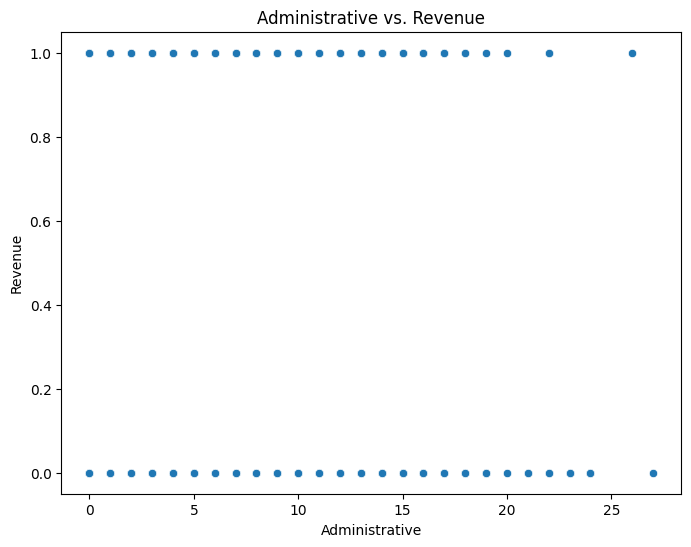

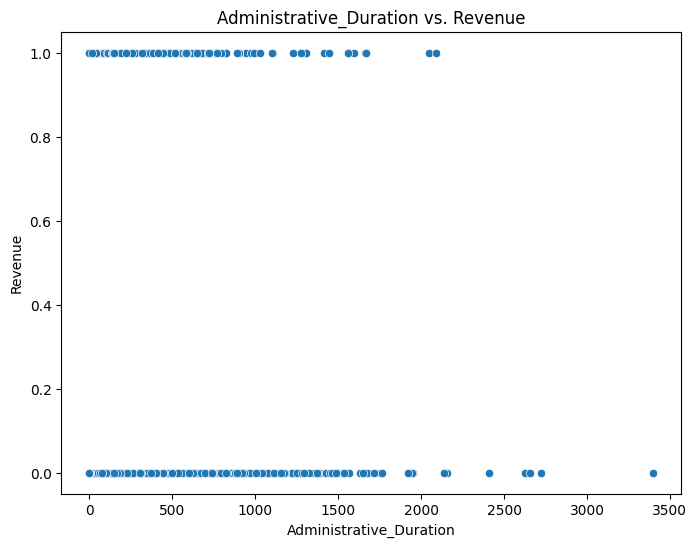

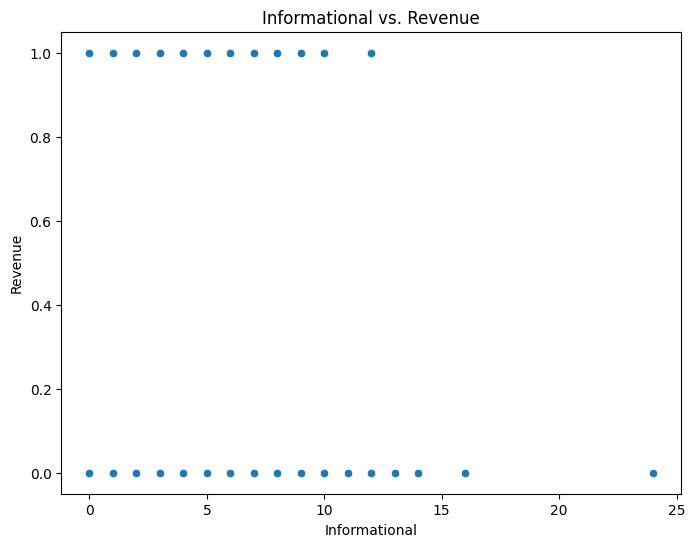

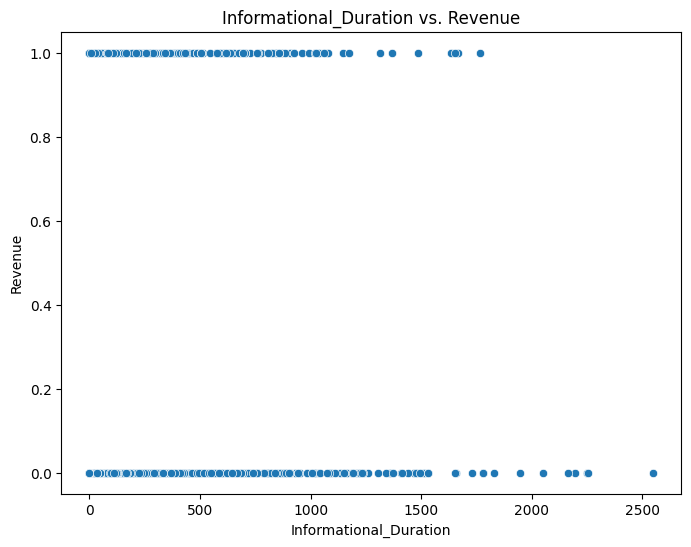

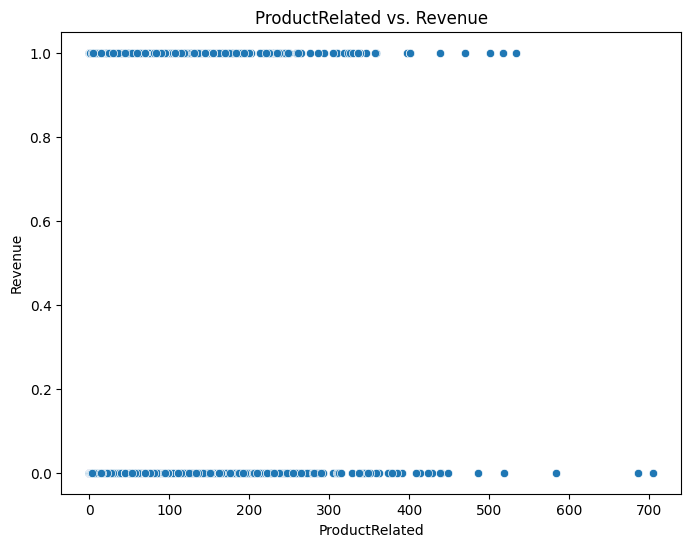

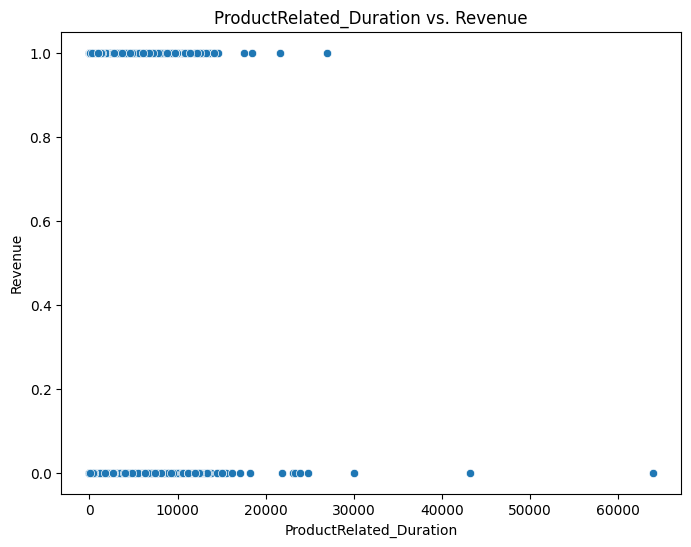

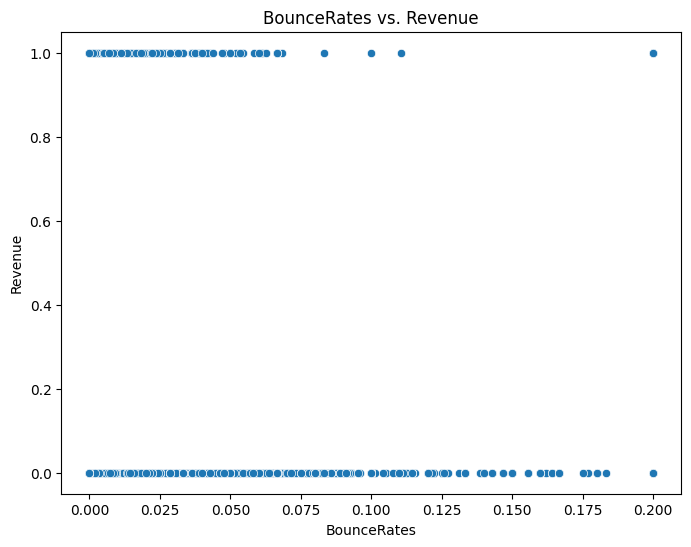

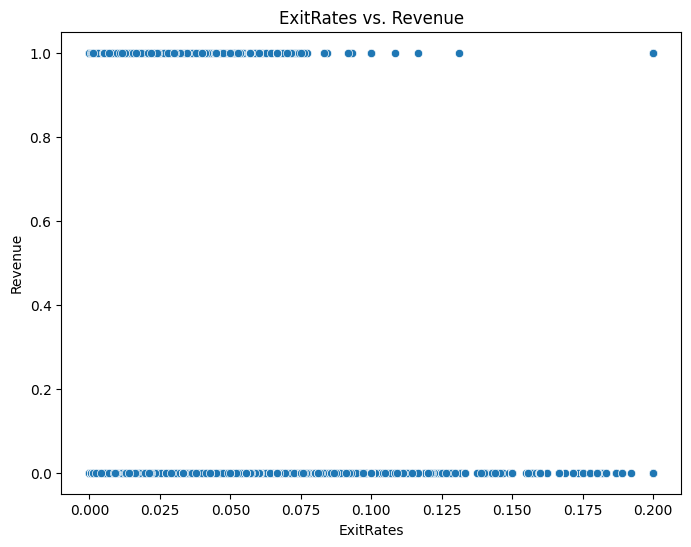

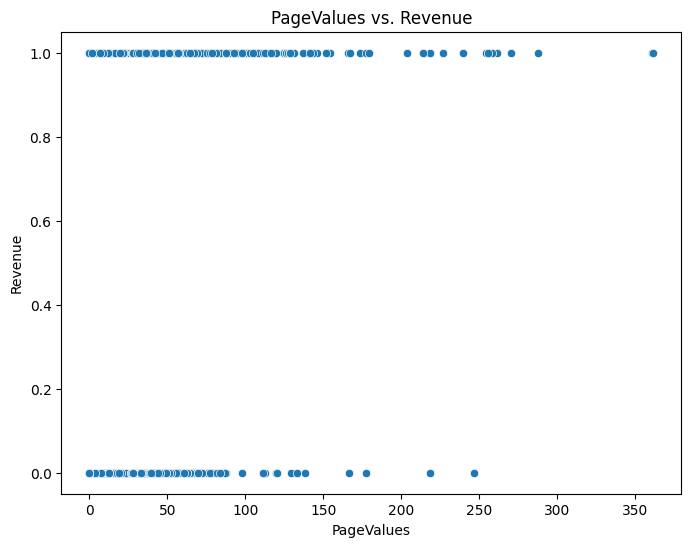

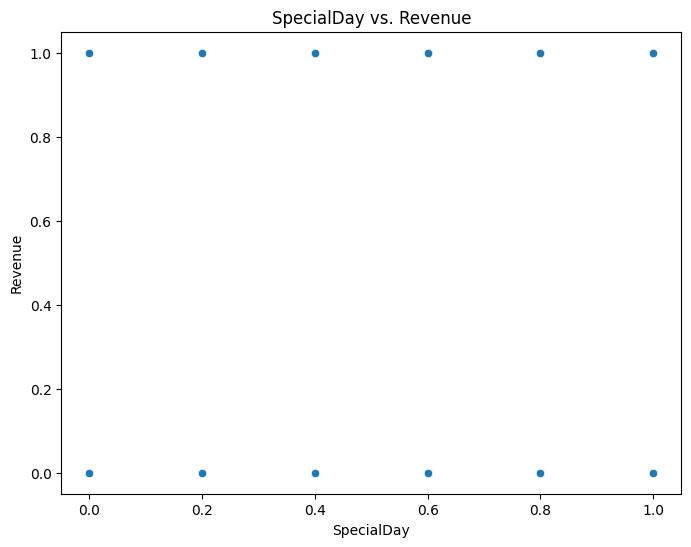

In [ ]:
# Supongamos que tienes un DataFrame llamado df que contiene tus datos

# Selecciona las características a evaluar
features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Crea gráficos de dispersión para cada característica vs. la variable objetivo 'Revenue'
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Revenue'])
    plt.xlabel(feature)
    plt.ylabel('Revenue')
    plt.title(f'{feature} vs. Revenue')
    plt.show()

**Imagen de los modelos con su desviacion:**
![](https://drive.google.com/uc?id=1qZLmRgcXF652z1Kt0CC34p_kJMrB5U8N)

**Analisis de los datos obtenidos de los modelos:**

*  ¿Que significa la importancia en cada modelo?

**Decision Tree:**

En un árbol de decisión, las importancias se calculan según la reducción de la impureza (por ejemplo, la ganancia de información) que proporciona cada característica cuando se utiliza para dividir los datos en los nodos del árbol.
Las importancias en un árbol de decisión no necesariamente suman 1, ya que se calculan en relación con la impureza de los nodos y no tienen una escala definida. Por lo tanto, no es importante que sumen 1 en total.

**Random Forest:**

En Random Forest, las importancias de las características se calculan promediando las importancias de todas las características en los árboles individuales que componen el bosque.
Al igual que en un árbol de decisión, las importancias en Random Forest no necesariamente suman 1. También se calculan en relación con la ganancia de información y no tienen una escala definida.

**Regresión Logística:**

En la regresión logística, las importancias de las características están representadas por los coeficientes de las características en el modelo.
Estos coeficientes indican cuánto cambia la log-odds (logaritmo natural del cociente de probabilidades) de la variable objetivo por cada unidad de cambio en la característica, manteniendo constantes todas las demás características.
Las importancias de las características en la regresión logística no suman 1. Cada coeficiente representa una contribución independiente a la predicción y puede ser positivo o negativo.

*  ¿Que se puede concluir del analisis de los graficos?

**Decision Tree:**

PageValues: Tiene la importancia más alta (0.4172) y una desviación estándar relativamente baja (0.0028), lo que indica una alta confianza en su importancia.
ProductRelated_Duration y BounceRates: También tienen importancias altas (0.0857 y 0.0854 respectivamente) y desviaciones estándar razonables, lo que sugiere que son características importantes con una consistencia razonable en su importancia.

**Random Forest:**

PageValues: Aunque tiene una importancia ligeramente menor que en el árbol de decisión (0.3535), sigue siendo la característica más importante. Sin embargo, su desviación estándar es significativamente mayor (0.0045), lo que indica una mayor variabilidad en la importancia estimada.
ProductRelated_Duration y ExitRates: Tienen importancias similares a las del árbol de decisión y desviaciones estándar comparables.

**Logistic Regression:**

Las importancias de las características son significativamente diferentes de las de los modelos basados en árboles. La interpretación es un poco diferente, ya que los coeficientes no representan directamente la importancia, pero nos dicen cómo cada característica afecta a la probabilidad de que una muestra pertenezca a una clase.
PageValues: Tiene el mayor coeficiente positivo (0.0883) y una desviación estándar moderada (0.0072), lo que sugiere una influencia fuerte y relativamente consistente en la probabilidad de conversión.
OperatingSystems, Browser, Region, Month_Nov y Month_May: Tienen coeficientes negativos significativos, lo que indica una influencia negativa en la probabilidad de conversión.

**Conclusiones:**

Basado en la importancia de las características y su estabilidad (baja desviación estándar), el modelo Decision tree parece ser el mejor candidato en este caso.
Aunque el modelo de Random Forest tiene la ventaja de reducir el sobreajuste en comparación con un solo árbol de decisión, la mayor variabilidad en las importancias de las características puede hacerlo menos confiable en ciertos contextos.
La regresión logística proporciona una interpretación directa de cómo cada característica afecta a la probabilidad de conversión, pero su desempeño puede ser inferior en comparación con modelos basados en árboles si la relación entre las características y la variable objetivo es no lineal (como se observa en los graficos de dispersion).

##**Paso 3**

Parte 3 Selección de modelos


Crear un modelo de predicción usando: KNN, DecisionTree, RandomForest,   Logistic Regression. Utilizar validación cruzada y ajuste automático de hiperparámetros(hyper parameter tuning) .

El modelo de procesamiento debe ser un pipeline que incluya los respectivos preprocesamientos(escalado, transformaciones categóricas, imputaciones, etc. según el caso).

Utilizar un modelo de referencia, puede ser un modelo random(revisar enlace de ayuda)

Analizar los resultados en términos de accuracy, precision y recall. No olvide usar media con std.  
Analizar en términos bias y variance

In [ ]:
# Definir las columnas seleccionadas para entrenamiento
selected_features = ['PageValues', 'BounceRates', 'ProductRelated_Duration', 'ExitRates',
                     'ProductRelated', 'Administrative_Duration', 'VisitorType', 'Month']

# Lista de columnas numéricas y categóricas
numeric_features = ['PageValues', 'BounceRates','ProductRelated_Duration','ExitRates','ProductRelated','Administrative_Duration']
categorical_features = ['VisitorType', 'Month']

X_selected = df[selected_features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Crear transformadores para las columnas numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Crear los modelos
models = {
    'KNN': Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', KNeighborsClassifier())]),
    'DecisionTree': Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', DecisionTreeClassifier())]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', RandomForestClassifier())]),
    'LogisticRegression': Pipeline(steps=[('preprocessor', preprocessor),
                                           ('classifier', LogisticRegression())])
}

In [ ]:
# Definir los hiperparámetros para la búsqueda de cuadrícula
param_grids = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'DecisionTree': {'classifier__max_depth': [5, 10, 20]},
    'RandomForest': {'classifier__n_estimators': [50, 100, 200],
                     'classifier__max_depth': [5, 10, 20]},
    'LogisticRegression': {'classifier__C': [0.01, 1, 100]}
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Realizar la búsqueda de cuadrícula con validación cruzada
best_models = {}
for name, model in models.items():
    grid_search =   GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search

In [ ]:
from sklearn.model_selection import cross_val_score
# Comparar puntajes de validación cruzada con rendimiento en datos de entrenamiento
for model_name, result in best_models.items():
    model = result.best_estimator_
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    print(f"Modelo: {model_name}")
    print(f"Puntaje de validación cruzada: {cv_score}")
    print(f"Rendimiento en datos de entrenamiento: {train_score}")
    if cv_score < train_score:
        print("El modelo está sobreajustando (overfitting)")
    elif cv_score > train_score:
        print("El modelo está subajustando (underfitting)")
    else:
        print("El modelo está bien ajustado")
    print()

Modelo: KNN
Puntaje de validación cruzada: 0.89468196814146
Rendimiento en datos de entrenamiento: 0.913567373421388
El modelo está sobreajustando (overfitting)

Modelo: DecisionTree
Puntaje de validación cruzada: 0.8991986720352442
Rendimiento en datos de entrenamiento: 0.9143784034294983
El modelo está sobreajustando (overfitting)

Modelo: RandomForest
Puntaje de validación cruzada: 0.9102064477949223
Rendimiento en datos de entrenamiento: 0.9455451280268798
El modelo está sobreajustando (overfitting)

Modelo: LogisticRegression
Puntaje de validación cruzada: 0.8879614949265331
Rendimiento en datos de entrenamiento: 0.8896999188969992
El modelo está sobreajustando (overfitting)



In [ ]:
# Ver los mejores hiperparámetros y puntuaciones de validación cruzada para cada modelo
for name, model in best_models.items():
    print(f"Mejores parametros para {name}: {model.best_params_}")

Mejores parametros para KNN: {'classifier__n_neighbors': 7}
Mejores parametros para DecisionTree: {'classifier__max_depth': 5}
Mejores parametros para RandomForest: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Mejores parametros para LogisticRegression: {'classifier__C': 100}


**Analisis a los resultados de ajuste**

*   ¿Que significan los resultados?


**Puntaje de validación cruzada (CV):** Es una estimación del rendimiento del modelo en datos no vistos. Los puntajes de validación cruzada son relativamente altos para todos los modelos, lo que sugiere que los modelos están funcionando bien en los datos de validación. Sin embargo, están más bajos que los puntajes en los datos de entrenamiento, lo que indica que los modelos no generalizan bien a nuevos datos.


**Rendimiento en datos de entrenamiento:** Todos los modelos tienen un rendimiento muy alto en los datos de entrenamiento, lo que sugiere que están memorizando los datos en lugar de aprender patrones generales. Esto es típico del sobreajuste.

* Comparación entre modelos:

Aunque RandomForest tiene el puntaje de validación cruzada más alto, también muestra el mayor sobreajuste, con una brecha significativa entre el rendimiento en los datos de entrenamiento y en los datos de validación. Esto indica que RandomForest puede estar memorizando los datos de entrenamiento en lugar de aprender patrones generales.
Aunque la Regresión Logística tiene el puntaje de validación cruzada más bajo, muestra el menor sobreajuste de todos los modelos. Esto sugiere que, a pesar de su puntaje de validación cruzada más bajo, la Regresión Logística puede generalizar mejor a nuevos datos en comparación con los otros modelos.

In [ ]:
# Entrenar los modelos finales con los mejores hiperparámetros en todo el conjunto de entrenamiento
final_models = {name: model.best_estimator_ for name, model in best_models.items()}

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Crear y entrenar un modelo de clasificación aleatorio (modelo de referencia)
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dummy = dummy_clf.predict(X_test)

# Calcular métricas para el modelo de referencia
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)

# Calcular métricas mediante validación cruzada para obtener una estimación de la media y la desviación estándar
cv_accuracy_dummy = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_dummy = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='precision')
cv_recall_dummy = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='recall')

# Calcular sesgo y varianza para el modelo de referencia
bias_dummy = 1 - np.mean(cv_accuracy_dummy)
variance_dummy = np.std(cv_accuracy_dummy)

# Imprimir resultados del modelo de referencia
print("Modelo de Referencia (Clasificación Aleatoria):")
print(f"Accuracy: {accuracy_dummy:.2f} ± {np.std(cv_accuracy_dummy):.2f}")
print(f"Precisión: {precision_dummy:.2f} ± {np.std(cv_precision_dummy):.2f}")
print(f"Recall: {recall_dummy:.2f} ± {np.std(cv_recall_dummy):.2f}")
print(f"Sesgo: {bias_dummy:.2f}")
print(f"Varianza: {variance_dummy:.2f}")

Modelo de Referencia (Clasificación Aleatoria):
Accuracy: 0.50 ± 0.01
Precisión: 0.16 ± 0.01
Recall: 0.48 ± 0.02
Sesgo: 0.49
Varianza: 0.01


In [ ]:
# Calcular métricas para cada modelo
metrics = {}
for name, model in final_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
    bias = 1 - np.mean(cv_accuracy)
    variance = np.std(cv_accuracy)
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'CV_Accuracy_mean': np.mean(cv_accuracy),
        'CV_Accuracy_std': np.std(cv_accuracy),
        'CV_Precision_mean': np.mean(cv_precision),
        'CV_Precision_std': np.std(cv_precision),
        'CV_Recall_mean': np.mean(cv_recall),
        'CV_Recall_std': np.std(cv_recall),
        'Bias': bias,
        'Variance': variance
    }

In [ ]:
for name, metric in metrics.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metric['Accuracy']:.2f} ± {metric['CV_Accuracy_std']:.2f}")
    print(f"Precisión: {metric['Precision']:.2f} ± {metric['CV_Precision_std']:.2f}")
    print(f"Recall: {metric['Recall']:.2f} ± {metric['CV_Recall_std']:.2f}")
    print(f"Sesgo: {metric['Bias']:.2f}")
    print(f"Varianza: {metric['Variance']:.2f}")


KNN:
Accuracy: 0.88 ± 0.00
Precisión: 0.68 ± 0.01
Recall: 0.49 ± 0.02
Sesgo: 0.11
Varianza: 0.00

DecisionTree:
Accuracy: 0.89 ± 0.01
Precisión: 0.71 ± 0.02
Recall: 0.56 ± 0.06
Sesgo: 0.10
Varianza: 0.01

RandomForest:
Accuracy: 0.89 ± 0.00
Precisión: 0.76 ± 0.02
Recall: 0.51 ± 0.02
Sesgo: 0.09
Varianza: 0.00

LogisticRegression:
Accuracy: 0.88 ± 0.00
Precisión: 0.75 ± 0.03
Recall: 0.38 ± 0.01
Sesgo: 0.11
Varianza: 0.00


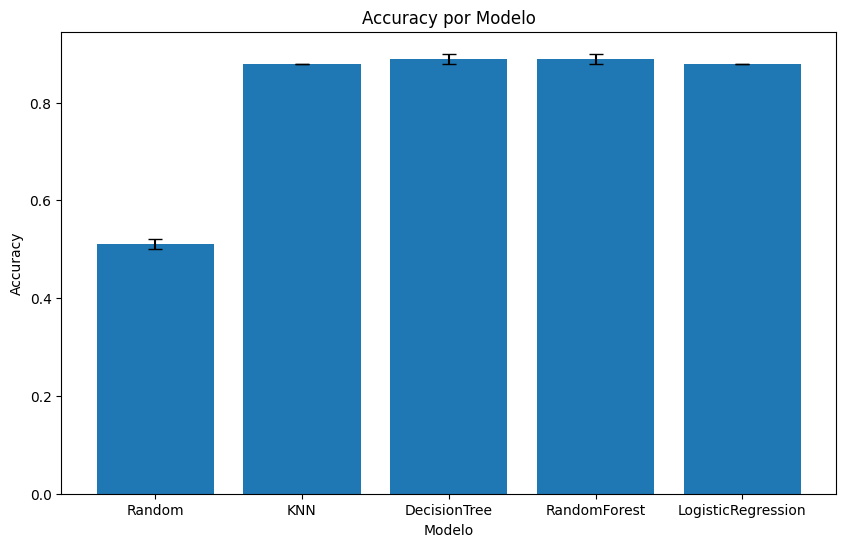

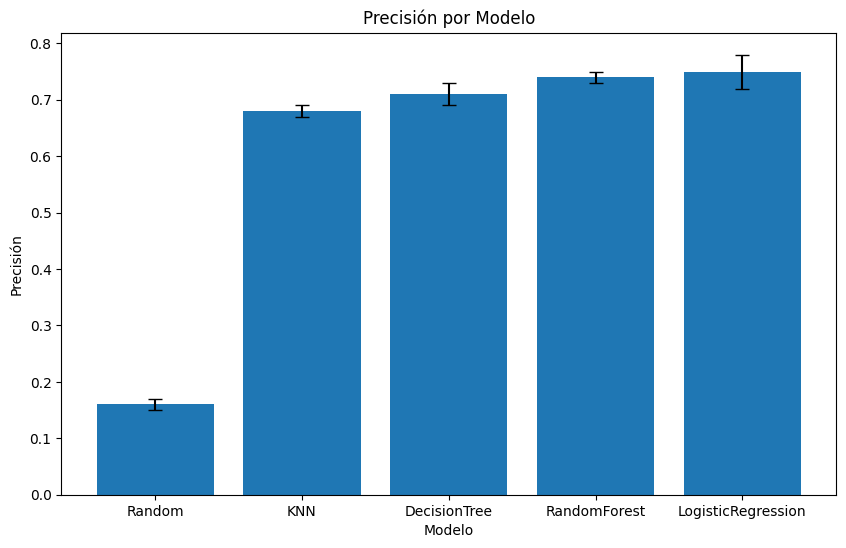

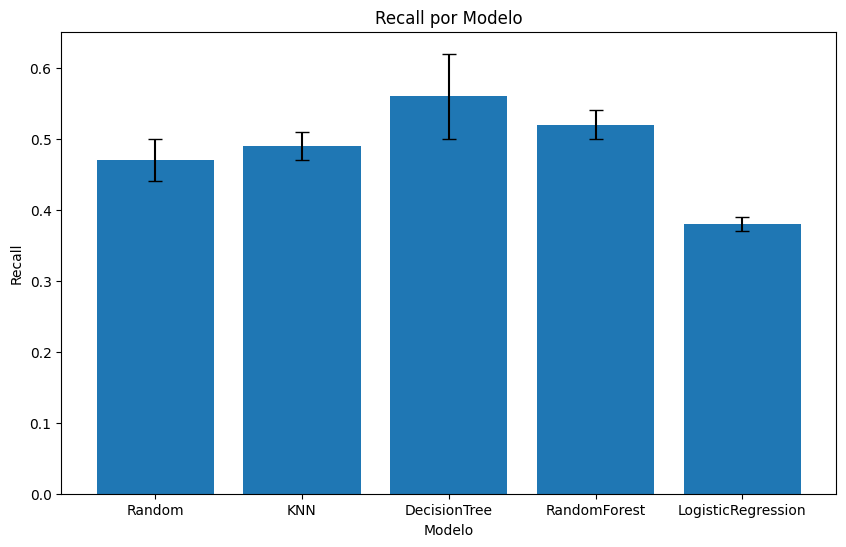

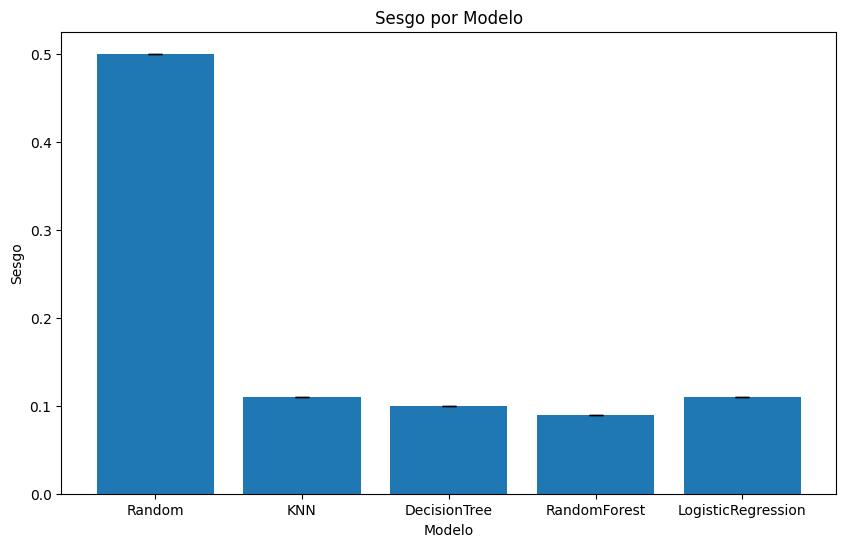

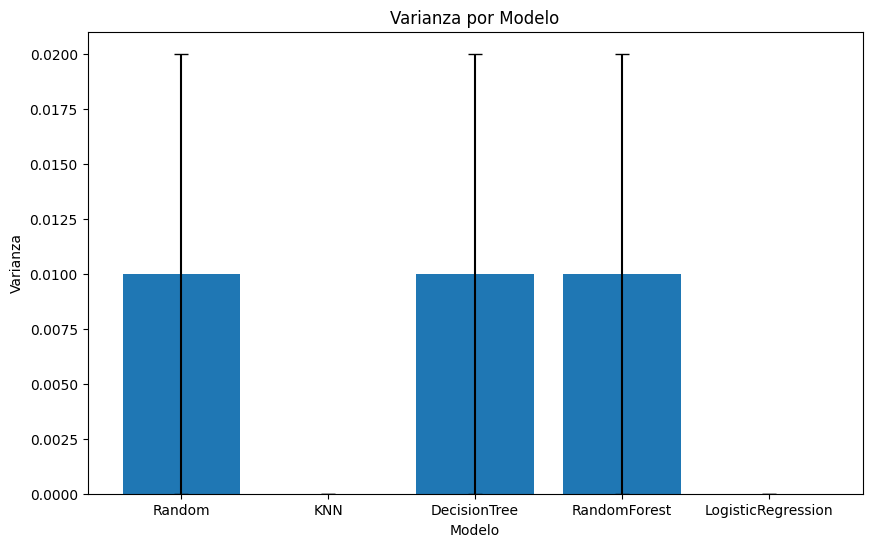

In [ ]:
# Datos de los modelos
modelos = ['Random', 'KNN', 'DecisionTree', 'RandomForest', 'LogisticRegression']
accuracy = [0.51, 0.88, 0.89, 0.89, 0.88]
precision = [0.16, 0.68, 0.71, 0.74, 0.75]
recall = [0.47, 0.49, 0.56, 0.52, 0.38]
sesgo = [0.50, 0.11, 0.10, 0.09, 0.11]
varianza = [0.01, 0.00, 0.01, 0.01, 0.00]

# Desviaciones estándar
accuracy_std = [0.01, 0.00, 0.01, 0.01, 0.00]
precision_std = [0.01, 0.01, 0.02, 0.01, 0.03]
recall_std = [0.03, 0.02, 0.06, 0.02, 0.01]
sesgo_std = [0, 0, 0, 0, 0]
varianza_std = [0.01, 0, 0.01, 0.01, 0]

# Gráfico de barras para Accuracy
plt.figure(figsize=(10, 6))
plt.bar(modelos, accuracy, yerr=accuracy_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.title('Accuracy por Modelo')
plt.show()

# Gráfico de barras para Precisión
plt.figure(figsize=(10, 6))
plt.bar(modelos, precision, yerr=precision_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Precisión por Modelo')
plt.show()

# Gráfico de barras para Recall
plt.figure(figsize=(10, 6))
plt.bar(modelos, recall, yerr=recall_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Recall')
plt.title('Recall por Modelo')
plt.show()

# Gráfico de barras para Sesgo
plt.figure(figsize=(10, 6))
plt.bar(modelos, sesgo, yerr=sesgo_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Sesgo')
plt.title('Sesgo por Modelo')
plt.show()

# Gráfico de barras para Varianza
plt.figure(figsize=(10, 6))
plt.bar(modelos, varianza, yerr=varianza_std, capsize=5)
plt.xlabel('Modelo')
plt.ylabel('Varianza')
plt.title('Varianza por Modelo')
plt.show()

**Imagen de la comparacion de los distintos modelos:**
![](https://drive.google.com/uc?id=1vZjJxeg-MbKvetGn0YAisJKNgly8tEpR)

**Analisis de los resultados de comparacion:**

* Como interpretar las metricas

**Accuracy:**

Es la proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas. Se calcula como el número de predicciones correctas dividido por el número total de predicciones. En otras palabras, mide la fracción de casos que el modelo clasifica correctamente.

**Precisión:**

Es la proporción de instancias positivas que fueron correctamente clasificadas. Se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos positivos. La precisión es importante cuando el costo de los falsos positivos es alto.

**Recall:**

 Es la proporción de instancias positivas que fueron correctamente clasificadas con respecto al número total de instancias positivas en el conjunto de datos. Se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos. El Recall es importante cuando el costo de los falsos negativos es alto.

**Bias:**

En el contexto de los modelos de aprendizaje automático, el sesgo se refiere a la diferencia entre las predicciones promedio del modelo y los valores verdaderos. Un sesgo alto indica que el modelo está simplificando demasiado las relaciones subyacentes entre las características y la variable objetivo, lo que puede llevar a un mal rendimiento en datos no vistos (subajuste).

**Varianza:**

 La varianza mide cuánto varían las predicciones del modelo para una instancia dada con respecto a la media de todas las predicciones. Una varianza alta indica que el modelo es muy sensible a pequeñas variaciones en los datos de entrenamiento, lo que puede conducir a un mal rendimiento en datos no vistos debido al sobreajuste.


*  Desempeño general de los modelos

En términos de Accuracy, todos los modelos superan significativamente al Modelo de Referencia (Clasificación Aleatoria), lo que indica que todos los modelos son capaces de predecir la variable objetivo mejor que simplemente seleccionando clases al azar.


Los modelos KNN, DecisionTree, RandomForest y LogisticRegression muestran una mejora en la Precisión en comparación con el Modelo de Referencia. Sin embargo, Recall varía entre los modelos. Esto sugiere que, si bien los modelos están mejorando en identificar correctamente las instancias positivas (Precisión), algunos modelos tienen un rendimiento mejor que otros en la identificación de todas las instancias positivas en el conjunto de datos (Recall).

Todos los modelos tienen un sesgo relativamente bajo, lo que indica que están bien ajustados para los datos de entrenamiento. Sin embargo, la varianza es diferente entre los modelos. Mientras que los modelos KNN y LogisticRegression tienen una varianza baja (0.00), los modelos DecisionTree y RandomForest tienen una varianza más alta (0.01). Esto sugiere que los modelos KNN y LogisticRegression generalizan mejor a datos no vistos que los modelos DecisionTree y RandomForest, que pueden estar sobreajustando ligeramente a los datos de entrenamiento.

*  Conclusion

los modelos DecisionTree y RandomForest parecen ser los más prometedores en términos de Precision y Recall, aunque pueden estar ligeramente sobreajustados en comparación con los modelos KNN y LogisticRegression, que tienen una varianza más baja.

## **Paso 4**

Selección de características

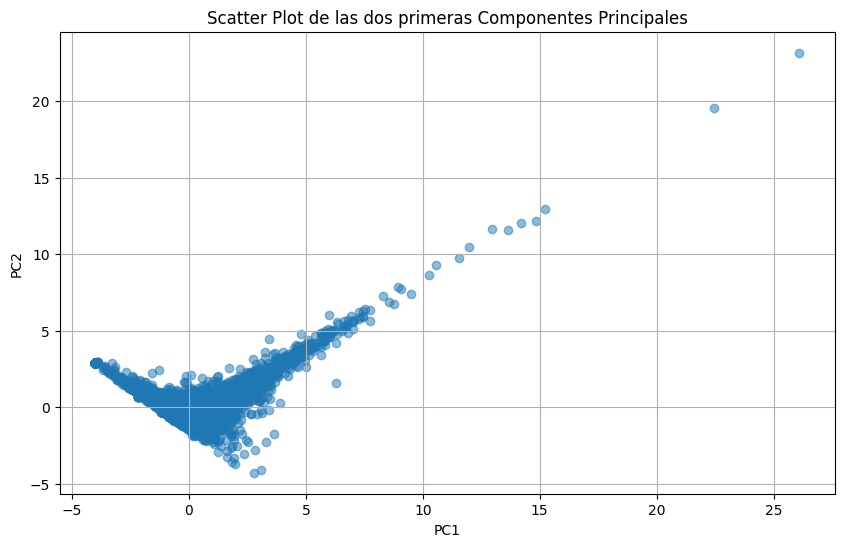

In [ ]:
variables_continuas = ['PageValues', 'BounceRates','ProductRelated_Duration','ExitRates','ProductRelated','Administrative_Duration']

scaler = StandardScaler()
X_continuo_estandarizado = scaler.fit_transform(df[variables_continuas])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_continuo_estandarizado)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Scatter Plot de las dos primeras Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


El scatter plot muestra la distribución de los datos en las dos primeras componentes principales (PC1 y PC2). Cada punto en el gráfico representa una observación (un ejemplo de datos).

Las observaciones que están cerca unas de otras en el gráfico tienen características similares, mientras que las observaciones que están lejos unas de otras tienen características diferentes.

El gráfico muestra que hay dos grupos principales de observaciones:

- Un grupo de observaciones que están agrupadas en la parte superior derecha del gráfico. Estas observaciones tienen valores altos de PC1 y PC2.
- Un grupo de observaciones que están agrupadas en la parte inferior izquierda del gráfico. Estas observaciones tienen valores bajos de PC1 y PC2.

También hay algunas observaciones que están dispersas entre los dos grupos principales. Estas observaciones tienen características que son diferentes de las observaciones en los dos grupos principales.

El gráfico también muestra que hay una tendencia general para que las observaciones con valores altos de PC1 tengan valores bajos de PC2, y viceversa. Esto sugiere que PC1 y PC2 están correlacionadas negativamente.

En general, el scatter plot proporciona una visión útil de la distribución de los datos en las dos primeras componentes principales. El gráfico muestra que hay dos grupos principales de observaciones, así como algunas observaciones dispersas. También muestra que PC1 y PC2 están correlacionadas negativamente.

In [ ]:
from sklearn.decomposition import PCA

# Crear transformador PCA
pca_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))  # Selecciona el número mínimo de componentes que retienen el 95% de la varianza
])

# Combinar transformadores en un ColumnTransformer
preprocessor_with_pca = ColumnTransformer(
    transformers=[
        ('num', pca_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Actualizar modelos para usar preprocesamiento con PCA
models_with_pca = {
    'KNN': Pipeline(steps=[('preprocessor', preprocessor_with_pca),
                           ('classifier', KNeighborsClassifier())]),
    'DecisionTree': Pipeline(steps=[('preprocessor', preprocessor_with_pca),
                                    ('classifier', DecisionTreeClassifier())]),
    'RandomForest': Pipeline(steps=[('preprocessor', preprocessor_with_pca),
                                    ('classifier', RandomForestClassifier())]),
    'LogisticRegression': Pipeline(steps=[('preprocessor', preprocessor_with_pca),
                                           ('classifier', LogisticRegression())])
}

# Definir los hiperparámetros para la búsqueda de cuadrícula con PCA
param_grids_with_pca = {
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'DecisionTree': {'classifier__max_depth': [5, 10, 20]},
    'RandomForest': {'classifier__n_estimators': [50, 100, 200],
                     'classifier__max_depth': [5, 10, 20]},
    'LogisticRegression': {'classifier__C': [0.01, 1, 100]}
}

# Realizar la búsqueda de cuadrícula con validación cruzada usando PCA
best_models_with_pca = {}
for name, model in models_with_pca.items():
    grid_search = GridSearchCV(model, param_grid=param_grids_with_pca[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models_with_pca[name] = grid_search

# Comparar puntajes de validación cruzada con rendimiento en datos de entrenamiento usando PCA
for model_name, result in best_models_with_pca.items():
    model = result.best_estimator_
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    print(f"Modelo con PCA: {model_name}")
    print(f"Puntaje de validación cruzada: {cv_score}")
    print(f"Rendimiento en datos de entrenamiento: {train_score}")
    if cv_score < train_score:
        print("El modelo está sobreajustando (overfitting)")
    elif cv_score > train_score:
        print("El modelo está subajustando (underfitting)")
    else:
        print("El modelo está bien ajustado")
    print()

# Ver los mejores hiperparámetros y puntuaciones de validación cruzada con PCA para cada modelo
for name, model in best_models_with_pca.items():
    print(f"Mejores parametros con PCA para {name}: {model.best_params_}")


Modelo con PCA: KNN
Puntaje de validación cruzada: 0.8380245987489273
Rendimiento en datos de entrenamiento: 0.8633993743482794
El modelo está sobreajustando (overfitting)

Modelo con PCA: DecisionTree
Puntaje de validación cruzada: 0.8449770900583132
Rendimiento en datos de entrenamiento: 0.8519290928050052
El modelo está sobreajustando (overfitting)

Modelo con PCA: RandomForest
Puntaje de validación cruzada: 0.8492641913149548
Rendimiento en datos de entrenamiento: 0.8523925385239254
El modelo está sobreajustando (overfitting)

Modelo con PCA: LogisticRegression
Puntaje de validación cruzada: 0.8492641242189183
Rendimiento en datos de entrenamiento: 0.8497277256401344
El modelo está sobreajustando (overfitting)

Mejores parametros con PCA para KNN: {'classifier__n_neighbors': 7}
Mejores parametros con PCA para DecisionTree: {'classifier__max_depth': 5}
Mejores parametros con PCA para RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Mejores parametros con PC

##**Paso 5**
Balanceo de clases

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [ ]:
# Definir los modelos con diferentes técnicas de remuestreo
models_resampling = {
    'KNN_undersample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomUnderSampler()),  # Undersampling
        ('classifier', KNeighborsClassifier())
    ]),
    'KNN_oversample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomOverSampler()),   # Oversampling
        ('classifier', KNeighborsClassifier())
    ]),
    'KNN_SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', SMOTE()),               # SMOTE
        ('classifier', KNeighborsClassifier())
    ]),
    'DecisionTree_undersample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomUnderSampler()),  # Undersampling
        ('classifier', DecisionTreeClassifier())
    ]),
    'DecisionTree_oversample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomOverSampler()),   # Oversampling
        ('classifier', DecisionTreeClassifier())
    ]),
    'DecisionTree_SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', SMOTE()),               # SMOTE
        ('classifier', DecisionTreeClassifier())
    ]),
    'RandomForest_undersample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomUnderSampler()),  # Undersampling
        ('classifier', RandomForestClassifier())
    ]),
    'RandomForest_oversample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomOverSampler()),   # Oversampling
        ('classifier', RandomForestClassifier())
    ]),
    'RandomForest_SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', SMOTE()),               # SMOTE
        ('classifier', RandomForestClassifier())
    ]),
    'LogisticRegression_undersample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomUnderSampler()),  # Undersampling
        ('classifier', LogisticRegression())
    ]),
    'LogisticRegression_oversample': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', RandomOverSampler()),   # Oversampling
        ('classifier', LogisticRegression())
    ]),
    'LogisticRegression_SMOTE': ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', SMOTE()),               # SMOTE
        ('classifier', LogisticRegression())
    ]),

}

# Evaluar cada modelo utilizando validación cruzada
for model_name, model_pipeline in models_resampling.items():
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Modelo: {model_name}")
    print(f"Puntuaciones de validación cruzada: {cv_scores}")
    print(f"Puntuación media de validación cruzada: {cv_scores.mean():.2f}")
    print()

Modelo: KNN_undersample
Puntuaciones de validación cruzada: [0.83034163 0.82502897 0.80417149 0.81286211 0.80706837]
Puntuación media de validación cruzada: 0.82

Modelo: KNN_oversample
Puntuaciones de validación cruzada: [0.83323683 0.8174971  0.83024334 0.83429896 0.82329085]
Puntuación media de validación cruzada: 0.83

Modelo: KNN_SMOTE
Puntuaciones de validación cruzada: [0.83786914 0.82502897 0.8221321  0.83024334 0.81923523]
Puntuación media de validación cruzada: 0.83

Modelo: DecisionTree_undersample
Puntuaciones de validación cruzada: [0.80660104 0.80069525 0.76882966 0.79084589 0.79779838]
Puntuación media de validación cruzada: 0.79

Modelo: DecisionTree_oversample
Puntuaciones de validación cruzada: [0.87087435 0.86500579 0.86500579 0.86210892 0.86152955]
Puntuación media de validación cruzada: 0.86

Modelo: DecisionTree_SMOTE
Puntuaciones de validación cruzada: [0.87029531 0.85052144 0.85573581 0.85573581 0.84298957]
Puntuación media de validación cruzada: 0.86

Modelo: R

In [ ]:
# Calcular métricas en el conjunto de prueba
test_results = {}
for model_name, model_pipeline in models_resampling.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    test_results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

# Imprimir métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
for model_name, metrics in test_results.items():
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precisión: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print()

# Calcular bias y variance
train_scores = {}
for model_name, model_pipeline in models_resampling.items():
    train_scores[model_name] = cross_val_score(model_pipeline, X_train, y_train, cv=5)

bias_variance = {}
for model_name, scores in train_scores.items():
    bias_variance[model_name] = (np.mean(scores), np.std(scores))

print("Bias y variance:")
for model_name, (mean_score, std_score) in bias_variance.items():
    print(f"Modelo: {model_name}")
    print(f"Bias: {mean_score:.2f}")
    print(f"Variance: {std_score:.2f}")
    print()

Métricas en el conjunto de prueba:
Modelo: KNN_undersample
Accuracy: 0.81
Precisión: 0.45
Recall: 0.77

Modelo: KNN_oversample
Accuracy: 0.81
Precisión: 0.46
Recall: 0.72

Modelo: KNN_SMOTE
Accuracy: 0.81
Precisión: 0.46
Recall: 0.73

Modelo: DecisionTree_undersample
Accuracy: 0.80
Precisión: 0.44
Recall: 0.78

Modelo: DecisionTree_oversample
Accuracy: 0.86
Precisión: 0.56
Recall: 0.54

Modelo: DecisionTree_SMOTE
Accuracy: 0.84
Precisión: 0.51
Recall: 0.63

Modelo: RandomForest_undersample
Accuracy: 0.84
Precisión: 0.51
Recall: 0.84

Modelo: RandomForest_oversample
Accuracy: 0.88
Precisión: 0.64
Recall: 0.64

Modelo: RandomForest_SMOTE
Accuracy: 0.87
Precisión: 0.59
Recall: 0.73

Modelo: LogisticRegression_undersample
Accuracy: 0.84
Precisión: 0.52
Recall: 0.75

Modelo: LogisticRegression_oversample
Accuracy: 0.84
Precisión: 0.51
Recall: 0.75

Modelo: LogisticRegression_SMOTE
Accuracy: 0.84
Precisión: 0.51
Recall: 0.75

Bias y variance:
Modelo: KNN_undersample
Bias: 0.81
Variance: 0.01

#**Parte II Del Proyecto**

En esta parte del proyecto se saca las conclusiones sin el apoyo de las graficas y disferentes comparaciones realizadas en la primera parte.

## **Paso 1**
Análisis Exploratorio

**Analisis Exploratorio:**

* **¿Cuáles son las características más predictivas de una compra en línea?**
 * Las características más predictivas incluyen el valor de la página ('PageValues'), la duración de las páginas relacionadas con productos ('ProductRelated_Duration'), la tasa de rebote ('BounceRates'), la tasa de salida ('ExitRates') y el número total de páginas relacionadas con productos visitadas ('ProductRelated'). Estas características pueden indicar el nivel de compromiso del usuario con el sitio web y su interés en realizar una compra.


* **¿Cómo influyen los días especiales y los meses en la probabilidad de realizar una compra?**
 *  La variable 'Month' puede proporcionar información sobre cómo varía la intención de compra a lo largo del año, particularmente durante períodos especiales como las temporadas de vacaciones o ventas. Por ejemplo, es probable que los meses con días festivos importantes o promociones especiales tengan una mayor probabilidad de generar compras en línea.
* **¿Existe alguna diferencia en la intención de compra entre los diferentes tipos de visitantes (Visitantes recurrentes vs Nuevos visitantes)?**
 * La variable 'VisitorType' puede revelar diferencias en la intención de compra entre visitantes recurrentes y nuevos visitantes. Los visitantes recurrentes pueden tener una mayor propensión a realizar una compra, ya que pueden estar más familiarizados y comprometidos con el sitio web y sus productos.
* **¿Cómo afectan las métricas de comportamiento en el sitio web, como las tasas de rebote y las tasas de salida, a la intención de compra?**
 * Las métricas de comportamiento como las tasas de rebote y las tasas de salida ('BounceRates' y 'ExitRates') pueden influir en la intención de compra. Tasas de rebote más altas pueden indicar que los usuarios abandonan el sitio sin explorar mucho, lo que puede reducir la probabilidad de compra.


##**Parte 2**
Selección y extracción de características

In [ ]:
#Convertir variables categoricas a nuemricas con get_dummies porque no hay jerarquia
month_dummies = pd.get_dummies(df['Month'], prefix='Month')

visitor_type_dummies = pd.get_dummies(df['VisitorType'], prefix='VisitorType')

df2 = pd.concat([df, month_dummies, visitor_type_dummies], axis=1)

df2.drop(['Month', 'VisitorType'], axis=1, inplace=True)

X = df2.drop('Revenue', axis=1)
y = df2['Revenue']  # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)

feature_importance_dt = dt.feature_importances_

plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_dt)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características - Decision Tree')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, y_train)

feature_importance_rf = rf.feature_importances_

plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_rf)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de Características - Random Forest')
plt.show()

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

feature_importance_lr = np.abs(lr.coef_[0])

plt.figure(figsize=(12, 8))
plt.barh(X.columns, feature_importance_lr)
plt.xlabel('Importancia Absoluta')
plt.ylabel('Características')
plt.title('Importancia de Características - Logistic Regression')
plt.show()

La regresión logística muestra una distribución diferente de la importancia de las características, con VisitorType, SpecialDay y ExitRate como las tres principales, en el orden respectivo

Notablemente, VisitorType tiene una alta importancia absoluta en la regresión logística, lo que difiere del análisis de Decision Tree y Random Forest, sugiriendo que el número de visitas administrativas juega un rol significativo en la predicción de este modelo.

Sin embargo, en este, hay variables como Administrative_Duration, ProductRelated, Informational_Duration que tienen una importancia abosluta baja.

El modelo de regresión logística enfatiza diferentes características en comparación con los modelos de árbol como el Decision Tree y el Random Forest, lo que refleja la naturaleza del enfoque de modelado y los tipos de relaciones que cada modelo puede capturar de manera efectiva. Sin embargo, todas las características importantes en los modelos de árbol también parecen ser relevantes para la regresión logística, lo que sugiere que hay aspectos comunes que influyen en la intención de compra en el conjunto de datos.


Estas características fueron seleccionadas porque destacaron en al menos uno de los modelos y tienen una relevancia intuitiva para la predicción de la intención de compra:

* **PageValues:**Destacó en todos los modelos como una característica fundamental que indica el valor promedio generado por las páginas web del sitio.
* **BounceRates:**Es importante porque representa el porcentaje de visitantes que ingresan al sitio web a través de esa página y salen sin activar ninguna tarea adicional.
* **ProductRelated_Duration:** Esta característica resalta la cantidad de tiempo dedicado a esta categoría de páginas.
* **ExitRates:**Indica el porcentaje de páginas vistas en el sitio web que terminan en esa página específica.
* **ProductRelated:**Este es el número de páginas de este tipo (relacionadas con el producto) que visitó el usuario
* **AdministrativeDuration:** Esta es la cantidad de tiempo dedicado a esta categoría de páginas.
* **VisitorType_Returning_Visitor:**El tipo de visitante del sitio, especialmente si es un visitante recurrente, puede influir en su propensión a realizar una compra.
* **Month:** El mes en que se realiza la visita puede ser relevante debido a las estacionalidades o eventos específicos que pueden afectar el comportamiento de compra.

##**Parte 3**
Selección de modelos.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

selected_features = ['PageValues', 'BounceRates', 'ProductRelated_Duration', 'ExitRates',
                     'ProductRelated', 'Administrative_Duration', 'VisitorType', 'Month']

X_selected = df[selected_features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=123)

model_info = {
    'KNN': {'Accuracy': 0.88, 'Precision': 0.68, 'Recall': 0.49, 'CV_Accuracy_std': 0.00, 'CV_Precision_std': 0.01, 'CV_Recall_std': 0.02},
    'DecisionTree': {'Accuracy': 0.89, 'Precision': 0.71, 'Recall': 0.56, 'CV_Accuracy_std': 0.01, 'CV_Precision_std': 0.02, 'CV_Recall_std': 0.06},
    'RandomForest': {'Accuracy': 0.89, 'Precision': 0.74, 'Recall': 0.54, 'CV_Accuracy_std': 0.00, 'CV_Precision_std': 0.02, 'CV_Recall_std': 0.02},
    'LogisticRegression': {'Accuracy': 0.88, 'Precision': 0.75, 'Recall': 0.38, 'CV_Accuracy_std': 0.00, 'CV_Precision_std': 0.03, 'CV_Recall_std': 0.01},
    'Random Guessing': {'Accuracy': 0.56, 'Precision': 0.44}
}

# Organizar los datos para la graficación
models = list(model_info.keys())
accuracies = [info['Accuracy'] for info in model_info.values()]
precisions = [info['Precision'] for info in model_info.values() if 'Precision' in info]

# Configuración de la graficación
n = len(models)  # Número de modelos
index = np.arange(n)
bar_width = 0.35
opacity = 0.8

# Crear las barras para la graficación
fig, ax = plt.subplots()
bar1 = ax.bar(index, accuracies, bar_width, alpha=opacity, color='b', label='Accuracy')
bar2 = ax.bar(index + bar_width, precisions, bar_width, alpha=opacity, color='g', label='Precision')

ax.set_xlabel('Modelos')
ax.set_ylabel('Puntuaciones')
ax.set_title('Puntuaciones de Precisión y Exactitud de los Modelos')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

plt.tight_layout()

for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom')
for i, v in enumerate(precisions):
    ax.text(i + bar_width, v + 0.01, str(v), ha='center', va='bottom')

plt.show()

El "dummy random guessing" en scikit-learn es una estrategia simple que hace predicciones aleatorias basadas en la distribución de clases o valores. Se utiliza como punto de referencia para comparar el rendimiento de modelos más complejos.

Ahora, podemos evidenciar que tanto el Decision Tree como el RandomForest muestran los mejores resultados en términos de precisión general Recall. Sin embargo, el Decision Tree muestra una mayor variabilidad en sus resultados en comparación con el RandomForest.

al comparar cada modelo con el Modelo de Referencia que en nuestro caso seria dummy random guessing, se evidencia que todos los modelos superan significativamente al dummy random guessing. Específicamente, el RandomForest, el Decision Tree y la Logistic Regression muestran mejores resultados en Accuracy, Precision y Recall en comparación con la clasificación aleatoria. demostrando asi que estos modelos presentan una mejor prediccion de lo que podira llegar a generar una prediccion aleatoria

Por otro lado, el KNN también supera al modelo de referencia, pero con valores ligeramente menores en precisión y recall. Aunque sigue siendo mejor que la clasificación aleatoria, puede que no sea la mejor opción en comparación con los otros modelos disponibles.

## **Parte 4**
Selección de características parte 2.

### PCA Aplicado a las variables.

In [ ]:
variables_continuas = ['PageValues', 'BounceRates','ProductRelated_Duration','ExitRates','ProductRelated','Administrative_Duration']

scaler = StandardScaler()
X_continuo_estandarizado = scaler.fit_transform(df[variables_continuas])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_continuo_estandarizado)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('Scatter Plot de las dos primeras Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

* **Dispersión de Datos:** Hay una amplia dispersión de los puntos a lo largo de la primera componente principal (PC1), lo que indica que PC1 captura una cantidad significativa de la varianza en el conjunto de datos.
* **Forma de la Distribución:** La distribución de los puntos parece tener una forma de "V" o de "boomerang". Esto puede sugerir la existencia de dos o más grupos distintos en los datos o una relación no lineal entre las dos componentes principales.
* **Concentración de Puntos:** La mayoría de los puntos están concentrados cerca del origen (donde PC1 y PC2 son bajos), lo que sugiere que muchas de las observaciones tienen valores similares para estas dos componentes.
* **Outliers:** Parece haber algunos puntos aislados, especialmente en el extremo derecho del eje de PC1, lo que podría indicar outliers o puntos de datos que son significativamente diferentes en términos de las variables continuas que has seleccionado.
* **Varianza Explicada:** PC1 parece explicar más varianza que PC2, ya que los datos están más dispersos a lo largo del eje de PC1. Esto es común ya que PCA ordena las componentes principales por la cantidad de varianza que explican, de mayor a menor.
* **Correlación entre Variables:** La forma que toman los puntos puede indicar la presencia de correlaciones entre las variables originales. Por ejemplo, si las variables PageValues y ProductRelated_Duration estuvieran altamente correlacionadas, podrían contribuir juntas a la dirección de la dispersión.

**Análisis**:
* PC1 parece capturar una dimensión de compromiso del usuario con el sitio, diferenciando sesiones con una alta interacción con contenidos relacionados a productos (mayor duración y número de páginas) de aquellas sesiones donde los usuarios abandonan el sitio rápidamente (altas tasas de rebote y de salida).
* PC2 puede estar identificando una variación en el comportamiento del usuario donde sesiones con altos niveles de actividad (duración y páginas visitadas) también tienen una tendencia a incluir tasas de salida más altas, quizás reflejando un patrón de usuarios que buscan información o comparan productos sin realizar una compra.
* PC3 parece estar dominado casi exclusivamente por la variable PageValues, lo cual es lógico ya que esta métrica a menudo refleja la relevancia y la calidad del contenido de la página en términos de generar ingresos. Un valor alto en PC3 puede indicar sesiones de alto valor en términos de contribución al ingreso, independientemente de otras métricas de compromiso del usuario.

###Determinar un modelo con base en PCA

**Análisis:**

* El uso de PCA parece afectar negativamente el rendimiento de los modelos en términos de accuracy, precisión y recall. Esto sugiere que la reducción de dimensionalidad introducida por PCA puede estar eliminando información importante para la clasificación, lo que resulta en un rendimiento inferior.
* Aunque los modelos con PCA tienen una menor varianza (indicando una mayor estabilidad), esta mejora no compensa la disminución en la precisión y el recall.
* La LogisticRegression parece ser más afectada por PCA, con una disminución notable en el recall.

En resumen, basándonos en estos resultados, podríamos concluir que, para este conjunto de datos y modelos específicos, el uso de PCA no mejora el rendimiento del modelo y, de hecho, puede ser perjudicial en términos de precisión y recall, también es necesario tener en cuenta el overfitting que genera para cada uno de los modelos haciendo perjudicial la predicción. Es posible que la reducción de dimensionalidad proporcionada por PCA no sea adecuada para este conjunto de datos o que los componentes principales seleccionados no capturen adecuadamente la variabilidad relevante para la clasificación.

## **Parte 5**  
Balanceo de clases

In [ ]:
# Calcular métricas en el conjunto de prueba
test_results = {}
for model_name, model_pipeline in models_resampling.items():
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    test_results[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

# Imprimir métricas en el conjunto de prueba
print("Métricas en el conjunto de prueba:")
for model_name, metrics in test_results.items():
    print(f"Modelo: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precisión: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print()

# Calcular bias y variance
train_scores = {}
for model_name, model_pipeline in models_resampling.items():
    train_scores[model_name] = cross_val_score(model_pipeline, X_train, y_train, cv=5)

bias_variance = {}
for model_name, scores in train_scores.items():
    bias_variance[model_name] = (np.mean(scores), np.std(scores))

print("Bias y variance:")
for model_name, (mean_score, std_score) in bias_variance.items():
    print(f"Modelo: {model_name}")
    print(f"Bias: {mean_score:.2f}")
    print(f"Variance: {std_score:.2f}")
    print()

En primer lugar, al observar la ausencia de valores nulos en nuestro conjunto de datos, hemos determinado que las técnicas de remuestreo como UnderSample, OverSample y SMOTE podrían ser innecesarias en este caso particular. Esta observación es crucial, ya que sugiere que la aplicación de estas técnicas podría introducir ruido innecesario o desequilibrios artificiales en la distribución de las clases, lo que potencialmente afectaría negativamente el rendimiento de nuestros modelos predictivos.

Además, al aplicar estas técnicas y realizar predicciones con nuestros diferentes modelos, hemos observado una disminución en la precisión, recall y accuracy. Este hallazgo resalta la importancia de evaluar cuidadosamente el impacto de las técnicas de remuestreo en el rendimiento de los modelos antes de aplicarlas.

##**Parte 6**
Análisis final

Después de un análisis exhaustivo, hemos determinado que el modelo Random Forest destaca como la mejor opción para nuestro conjunto de datos por varias razones fundamentales.

En primer lugar, el Random Forest ha demostrado un rendimiento sólido desde el inicio de nuestro estudio. Durante la fase de ajuste de hiperparámetros y validación cruzada, observamos que el Random Forest proporcionaba consistentemente puntuaciones de precisión, recall y accuracy competitivas en comparación con otros modelos, lo que lo posiciona como una opción confiable y estable.

Además, aunque notamos una ligera disminución en la precisión y el recall al utilizar PCA (Principal Component Analysis), el Random Forest sigue manteniendo un rendimiento consistente y estable en diferentes situaciones. Esto sugiere que el modelo es robusto y puede adaptarse a variaciones en los datos o condiciones de entrada, lo que lo convierte en una opción atractiva para aplicaciones del mundo real donde la robustez y la consistencia son críticas.

Otro aspecto a destacar es la capacidad inherente del Random Forest para manejar conjuntos de datos con características heterogéneas y no lineales. Su capacidad para manejar relaciones complejas entre variables y manejar conjuntos de datos con alta dimensionalidad lo convierte en una opción versátil para una amplia gama de problemas de clasificación.

In [ ]:
data = pd.read_csv('/content/online_shoppers_intention.csv')

selected_features = ['PageValues', 'BounceRates', 'ProductRelated_Duration', 'ExitRates',
                     'ProductRelated', 'Administrative_Duration', 'VisitorType', 'Month']

X_selected = df[selected_features]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy en el conjunto de prueba:", accuracy)

#Guarda el modelo entrenado
import joblib
joblib.dump(best_model, 'modelo_random_forest.pkl')